# Lending Club Case Study

### Importing required libraries

In [384]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Getting error saying to set low_memory=False or use dtype to save memory. Used dtype to save memory

In [385]:
df = pd.read_csv('/Users/ejanjanam/Downloads/loan.csv', parse_dates=['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'], 
                 date_format='%b-%y', dtype = {
    'id': int,
    'member_id': int,
    'loan_amnt': int,
    'funded_amnt': int,
    'funded_amnt_inv': float,
    'term': str,
    'int_rate': str,
    'installment': float,
    'grade': str,
    'sub_grade': str,
    'emp_title': str,
    'emp_length': str,
    'home_ownership': str,
    'annual_inc': float,
    'verification_status': str,
    'loan_status': str,
    'pymnt_plan': str,
    'url': str,
    'desc': str,
    'purpose': str,
    'title': str,
    'zip_code': str,
    'addr_state': str,
    'dti': float,
    'delinq_2yrs': int,
    'earliest_cr_line': str,
    'inq_last_6mths': int,
    'mths_since_last_delinq': str,
    'mths_since_last_record': str,
    'open_acc': int,
    'pub_rec': int,
    'revol_bal': int,
    'revol_util': str,
    'total_acc': int,
    'initial_list_status': str,
    'out_prncp': float,
    'out_prncp_inv': float,
    'total_pymnt': float,
    'total_pymnt_inv': float,
    'total_rec_prncp': float,
    'total_rec_int': float,
    'total_rec_late_fee': float,
    'recoveries': float,
    'collection_recovery_fee': float,
    'last_pymnt_amnt': float,
    'collections_12_mths_ex_med': str,
    'mths_since_last_major_derog': str,
    'policy_code': int,
    'application_type': str,
    'annual_inc_joint': str,
    'dti_joint': str,
    'verification_status_joint': str,
    'acc_now_delinq': int,
    'tot_coll_amt': str,
    'tot_cur_bal': str,
    'open_acc_6m': str,
    'open_il_6m': str,
    'open_il_12m': str,
    'open_il_24m': str,
    'mths_since_rcnt_il': str,
    'total_bal_il': str,
    'il_util': str,
    'open_rv_12m': str,
    'open_rv_24m': str,
    'max_bal_bc': str,
    'all_util': str,
    'total_rev_hi_lim': str,
    'inq_fi': str,
    'total_cu_tl': str,
    'inq_last_12m': str,
    'acc_open_past_24mths': str,
    'avg_cur_bal': str,
    'bc_open_to_buy': str,
    'bc_util': str,
    'chargeoff_within_12_mths': str,
    'delinq_amnt': int,
    'mo_sin_old_il_acct': str,
    'mo_sin_old_rev_tl_op': str,
    'mo_sin_rcnt_rev_tl_op': str,
    'mo_sin_rcnt_tl': str,
    'mort_acc': str,
    'mths_since_recent_bc': str,
    'mths_since_recent_bc_dlq': str,
    'mths_since_recent_inq': str,
    'mths_since_recent_revol_delinq': str,
    'num_accts_ever_120_pd': str,
    'num_actv_bc_tl': str,
    'num_actv_rev_tl': str,
    'num_bc_sats': str,
    'num_bc_tl': str,
    'num_il_tl': str,
    'num_op_rev_tl': str,
    'num_rev_accts': str,
    'num_rev_tl_bal_gt_0': str,
    'num_sats': str,
    'num_tl_120dpd_2m': str,
    'num_tl_30dpd': str,
    'num_tl_90g_dpd_24m': str,
    'num_tl_op_past_12m': str,
    'pct_tl_nvr_dlq': str,
    'percent_bc_gt_75': str,
    'pub_rec_bankruptcies': str,
    'tax_liens': str,
    'tot_hi_cred_lim': str,
    'total_bal_ex_mort': str,
    'total_bc_limit': str,
    'total_il_high_credit_limit': str
})

### Subtract 100 from years if the year is greater than 2011 as the datetime is considering only 21st century dates

In [386]:
date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
for col in date_cols:
    df.loc[df[col].dt.year > datetime.now().year, col] -= pd.DateOffset(years=100)

In [387]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


### Check how many columns are completely null

In [388]:
len(df.columns[df.isnull().all()])

54

### Dropping all null columns

In [389]:
all_null_columns = df[df.columns[df.isnull().all()]].columns
df = df.drop(columns=all_null_columns)
df.shape

(39717, 57)

### Check percentage of null values in remaining columns

In [390]:
(df.isnull().mean() * 100).round(2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.59
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

### Dropping columns having more than 60% null values

In [391]:
cols_with_60_per_nulls = df.columns[(df.isnull().mean() * 100).round(2) > 60]
df = df.drop(columns=cols_with_60_per_nulls)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,2016-05-01,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,2013-09-01,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,2016-05-01,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,2016-04-01,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,2016-05-01,0,1,INDIVIDUAL,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,2010-06-01,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,2010-07-01,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,2007-06-01,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,2007-06-01,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


### Check for unique values

In [392]:
unique_cols = []
for column in df.columns:
    if(df[column].nunique() == 1):
        unique_cols.append(column)
unique_cols

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

### Drop columns having single value as the constant values does not help in analysis

In [393]:
df = df.drop(columns=unique_cols)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,1213.88,2500.00,322.97,0.00,0.00,0.00,2010-07-01,80.90,2010-06-01,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,1020.51,8500.00,1413.49,0.00,0.00,0.00,2010-07-01,281.94,2010-07-01,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,1397.12,5000.00,272.16,0.00,0.00,0.00,2008-04-01,0.00,2007-06-01,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,672.66,5000.00,174.20,0.00,0.00,0.00,2008-01-01,0.00,2007-06-01,NaN


### Imputing values for columns ['emp_length', 'title', 'revol_util', 'pub_rec_bankruptcies', 'last_pymnt_d', 'last_credit_pull_d'] as there is noticeable difference in max repeating value to remaining values

In [394]:
impute_cols = ['emp_length', 'title', 'revol_util', 'pub_rec_bankruptcies', 'last_pymnt_d', 'last_credit_pull_d']

for col in impute_cols:
    most_repeat_val = df[col].value_counts().idxmax()
    df[col] = df[col].fillna(most_repeat_val)

df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,1213.88,2500.00,322.97,0.00,0.00,0.00,2010-07-01,80.90,2010-06-01,0
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,1020.51,8500.00,1413.49,0.00,0.00,0.00,2010-07-01,281.94,2010-07-01,0
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,1397.12,5000.00,272.16,0.00,0.00,0.00,2008-04-01,0.00,2007-06-01,0
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,672.66,5000.00,174.20,0.00,0.00,0.00,2008-01-01,0.00,2007-06-01,0


### Trunating values

In [395]:
df['int_rate'] = df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
df['emp_length'] = df['emp_length'].apply(lambda x: 0 if x == '< 1 year' else int(re.sub(r'\D', '', x)))
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].astype(int)

In [396]:
df['emp_length'].value_counts()

emp_length
10    9954
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: count, dtype: int64

### Seggregating month and year of loan issue month

In [397]:
# date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

df['issue_month'] = df['issue_d'].dt.month.astype(int)
df['issue_year'] = df['issue_d'].dt.year.astype(int)

current_date = datetime.now()
df['credit_history_length'] = ((current_date - df['earliest_cr_line']).dt.days / 365.25).astype(int)

df['last_pay_month'] = df['last_pymnt_d'].dt.month.astype(int)
df['last_pay_year'] = df['last_pymnt_d'].dt.year.astype(int)

In [398]:
(df.isnull().mean()*100).round(2)

id                          0.00
member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_title                   6.19
emp_length                  0.00
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
url                         0.00
desc                       32.59
purpose                     0.00
title                       0.00
zip_code                    0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
open_acc                    0.00
pub_rec                     0.00
revol_bal                   0.00
revol_util

In [399]:
extra_cols = ['id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 'sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'inq_last_6mths', 'open_acc', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_credit_pull_d' ]
num_cols = ['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'pub_rec', 'revol_bal', 'pub_rec_bankruptcies', 'credit_history_length']
cat_cols = ['term', 'grade', 'home_ownership', 'verification_status', 'issue_month', 'issue_year', 'loan_status', 'purpose', 'addr_state', 'last_pay_month', 'last_pay_year' ]

In [400]:
df = df.drop(columns=extra_cols)
df.shape

(39717, 25)

In [401]:
# df.select_dtypes(include=['int', 'float']).columns.tolist()
# df.select_dtypes(include=['object']).columns.tolist()
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0    38036
1     1674
2        7
Name: count, dtype: int64

In [402]:
df = df[~(df['loan_status'] == 'Current')]
df.shape

(38577, 25)

In [403]:
df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

## Univariate Analysis

### Numerical Variables

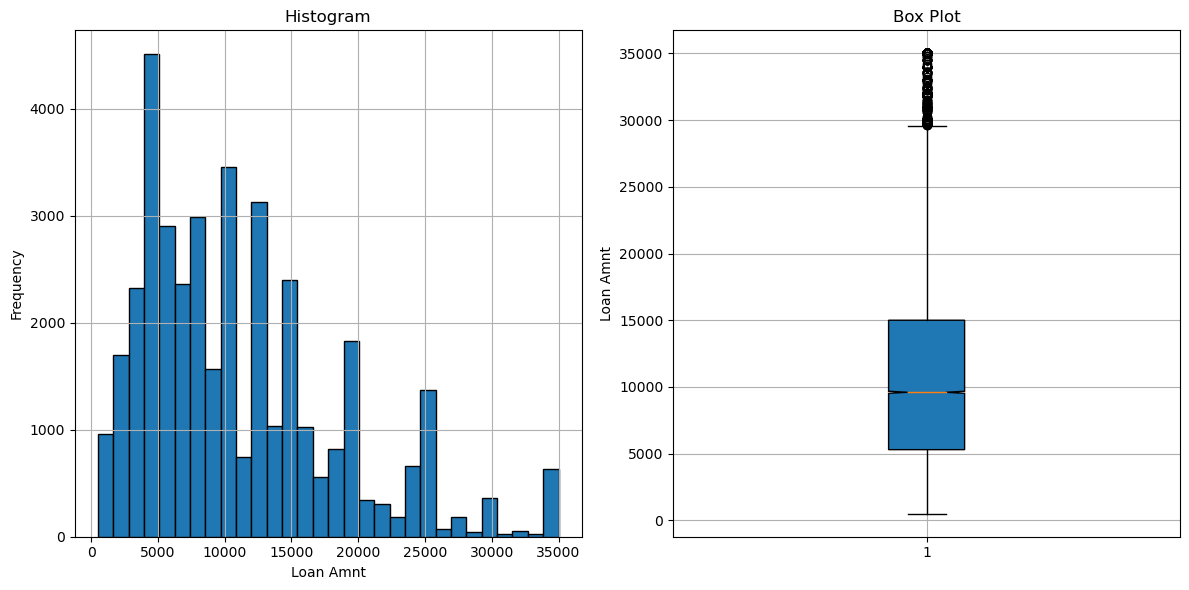

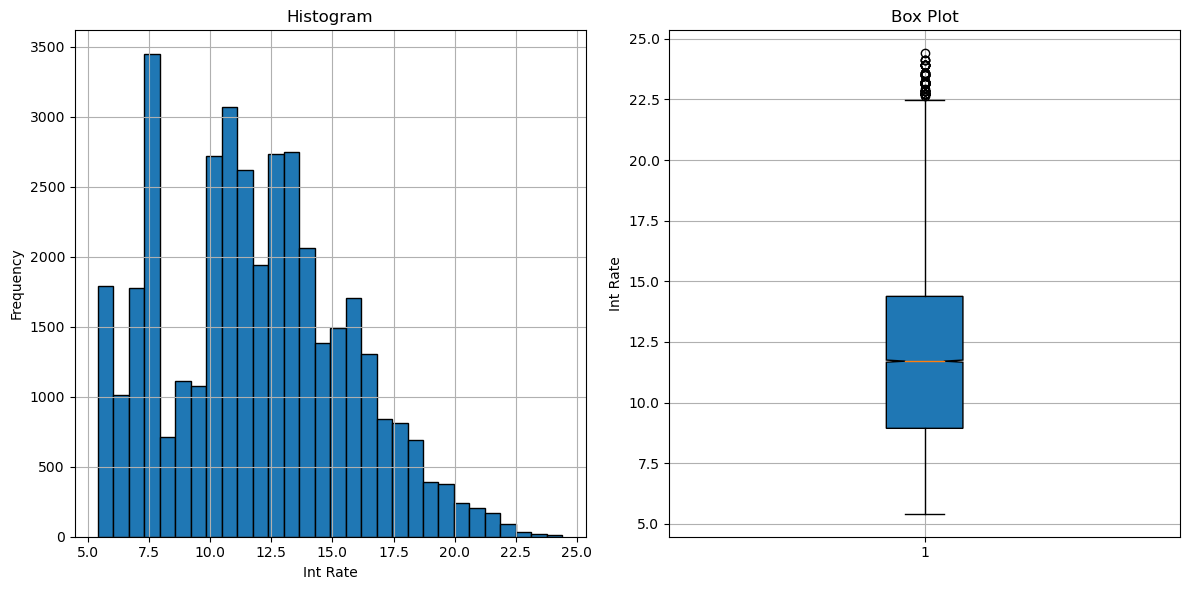

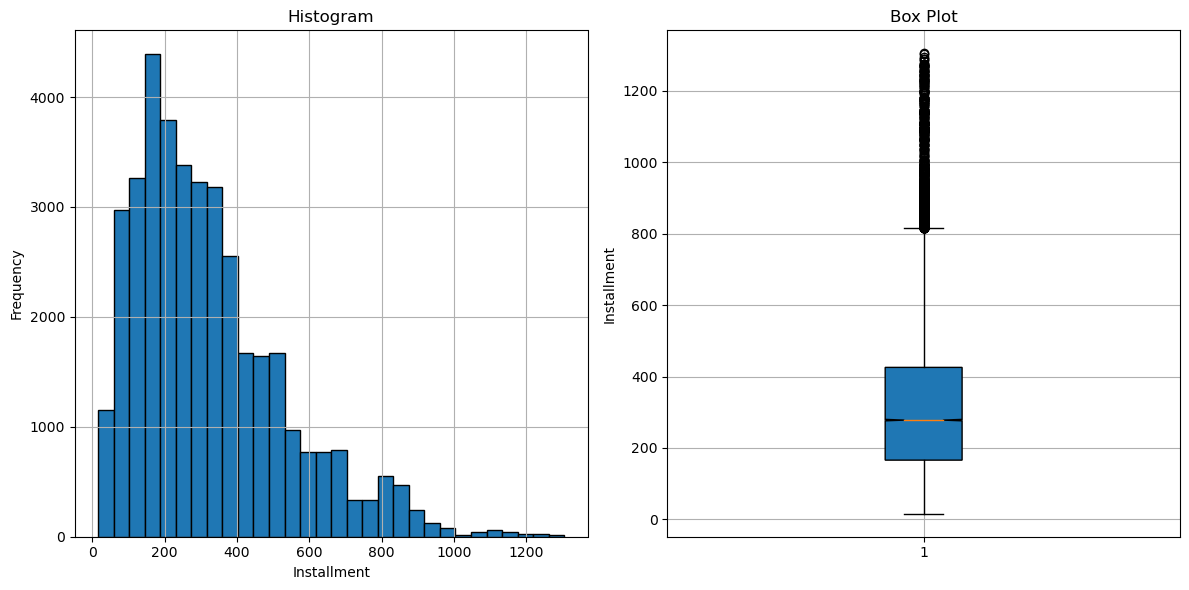

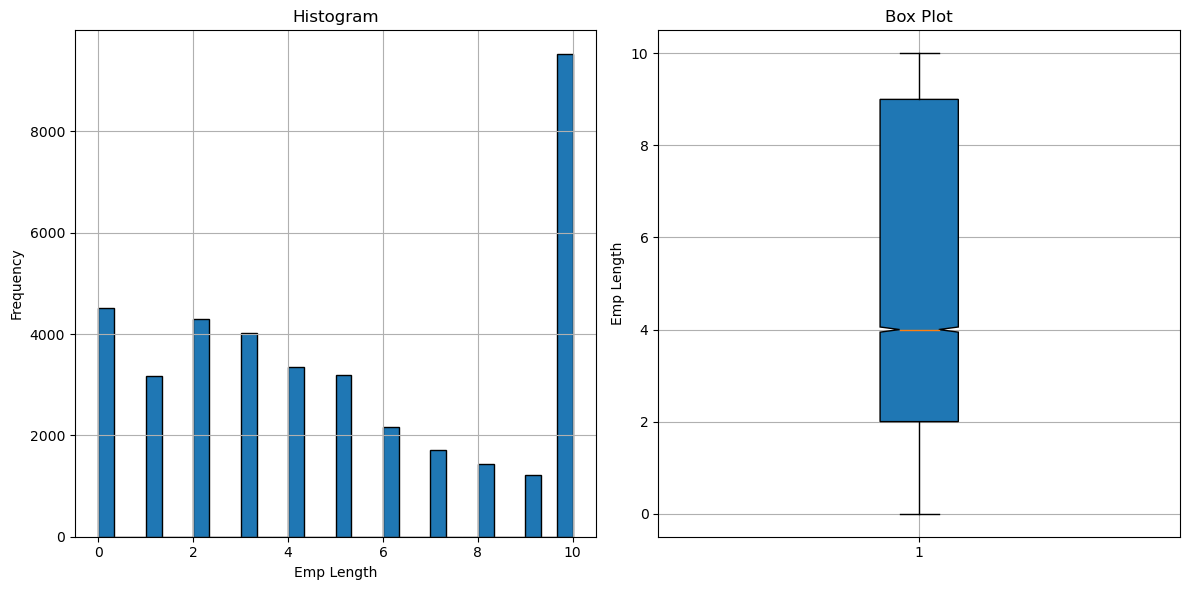

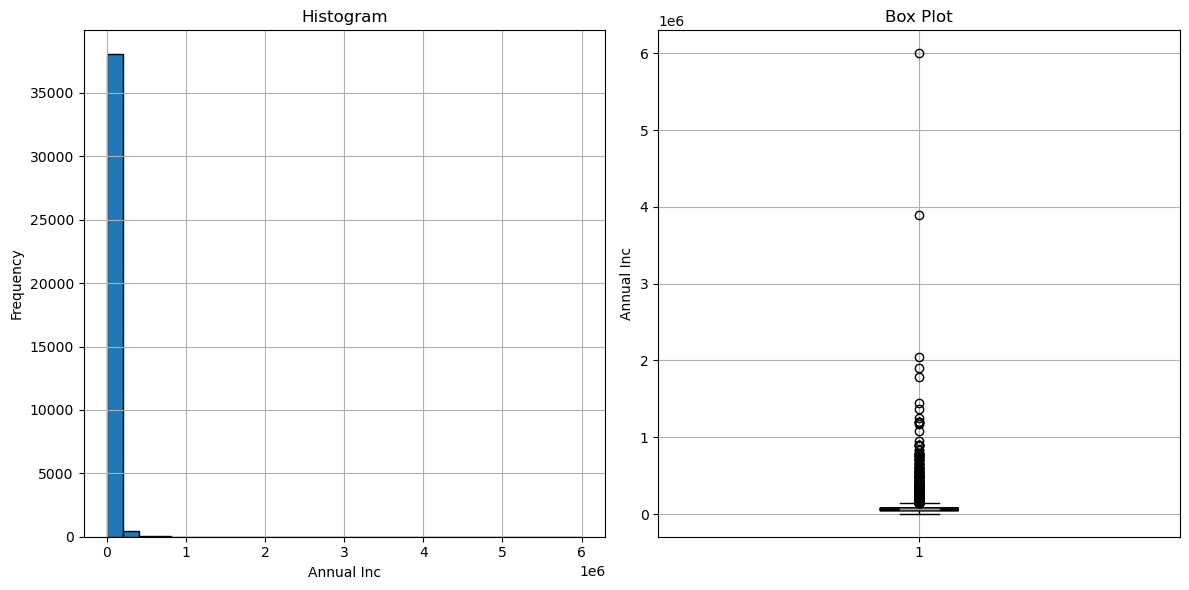

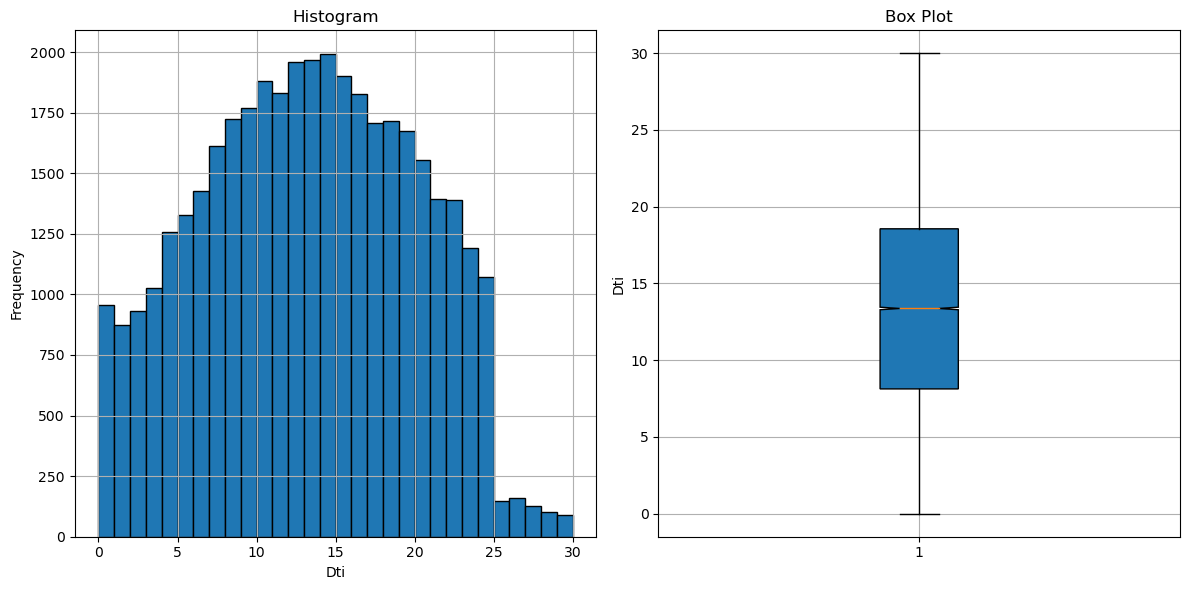

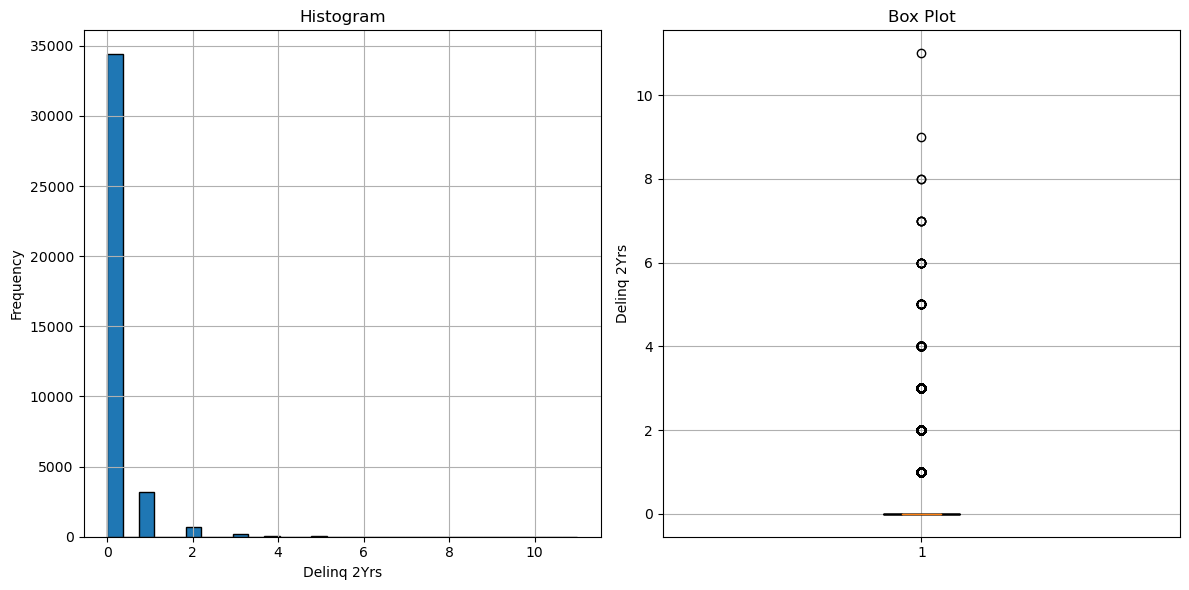

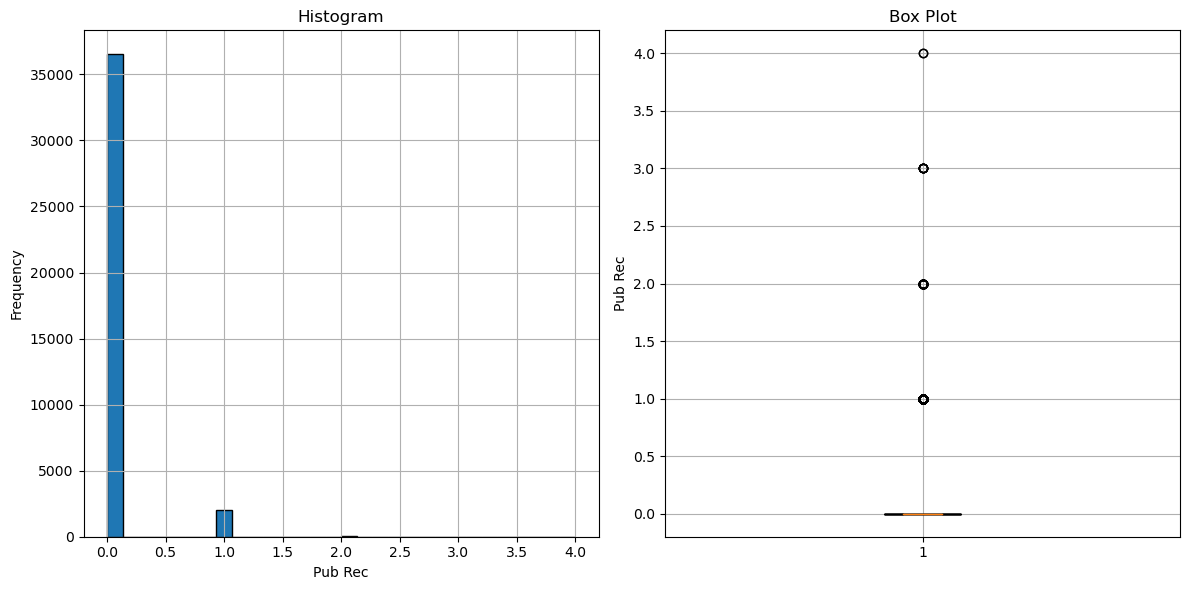

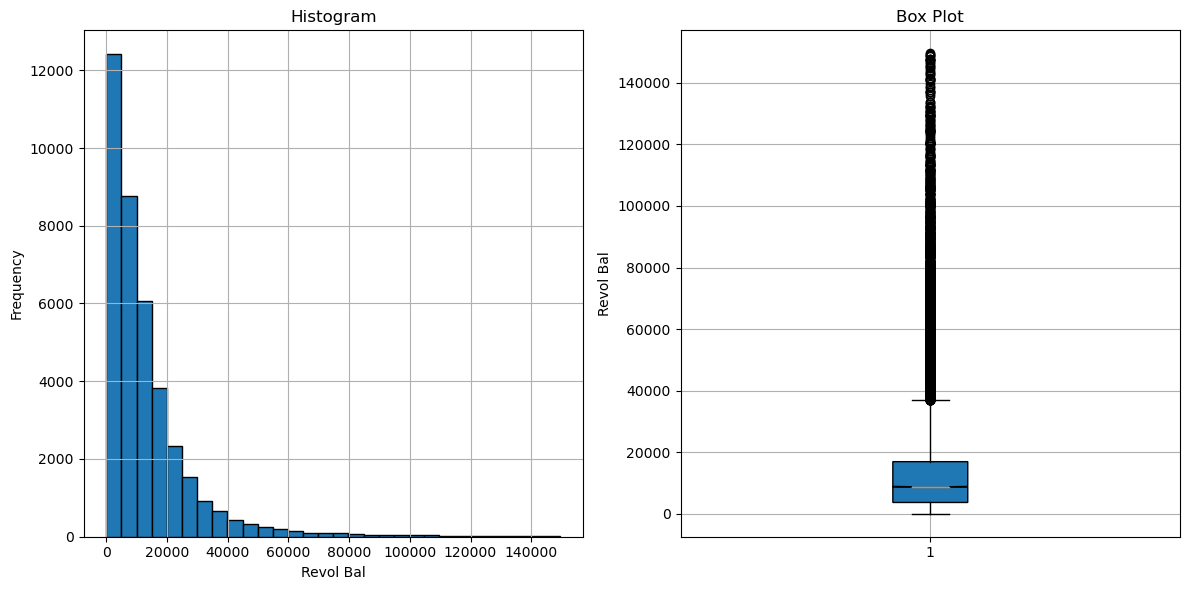

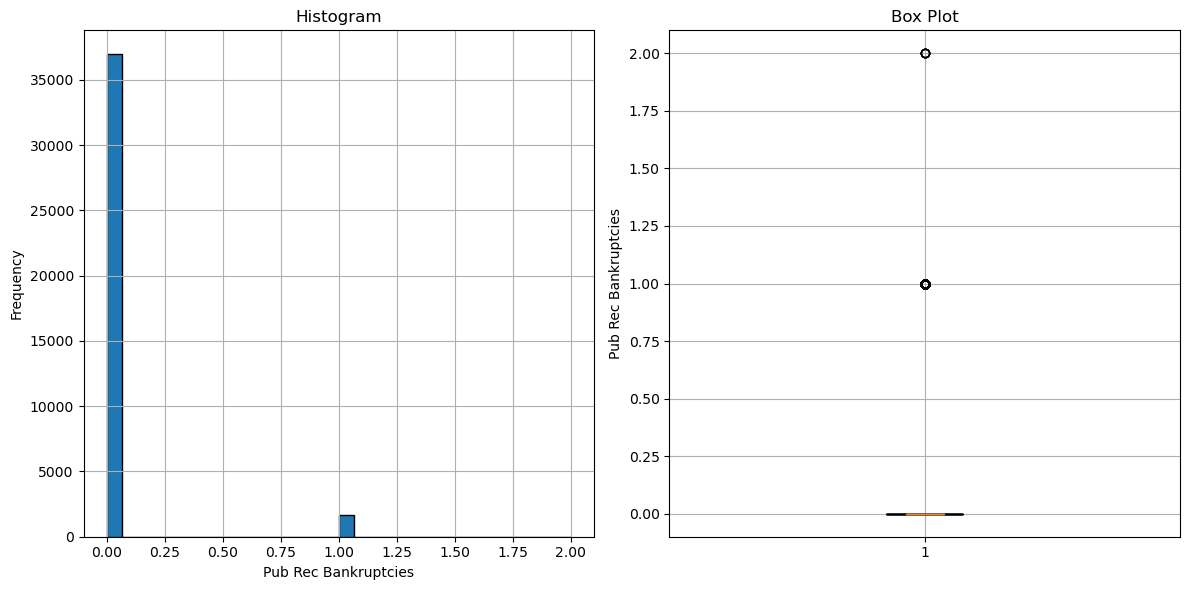

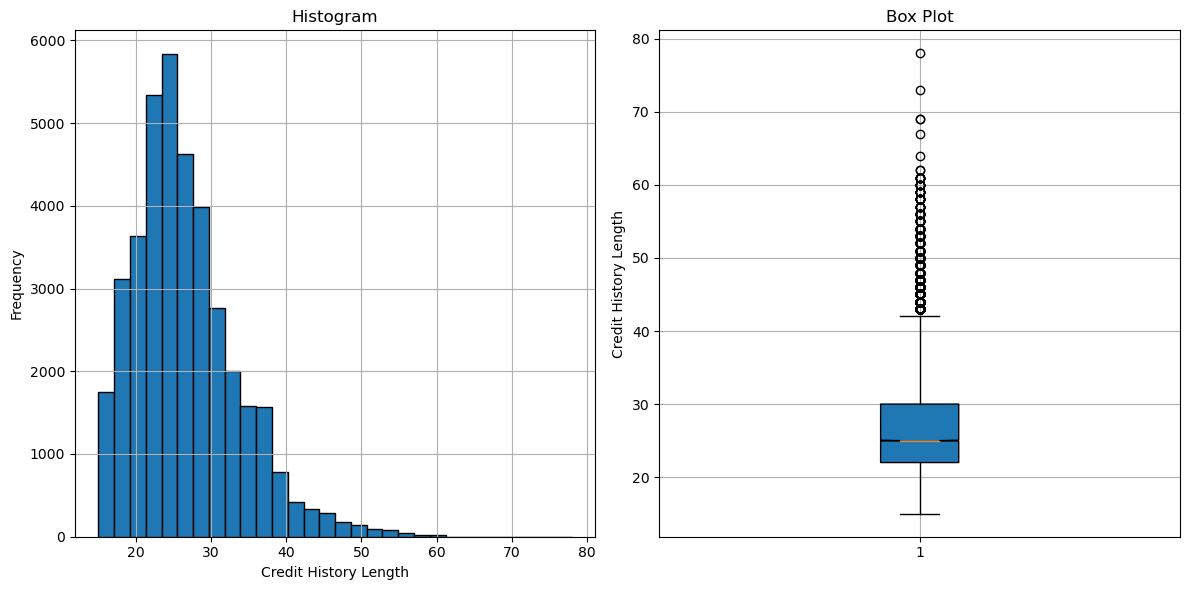

In [404]:
for col in num_cols:
    data = df[col]
    col_name = col.replace('_', ' ').title()
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plotting histogram
    axs[0].hist(data.sort_values(), bins=30, edgecolor='black')
    axs[0].set_title('Histogram')
    axs[0].set_xlabel(col_name)
    axs[0].set_ylabel('Frequency')
    axs[0].grid(True)

    # Plotting box plot
    axs[1].boxplot(data.sort_values(), patch_artist=True, notch=True)
    axs[1].set_title('Box Plot')
    axs[1].set_ylabel(col_name)
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()


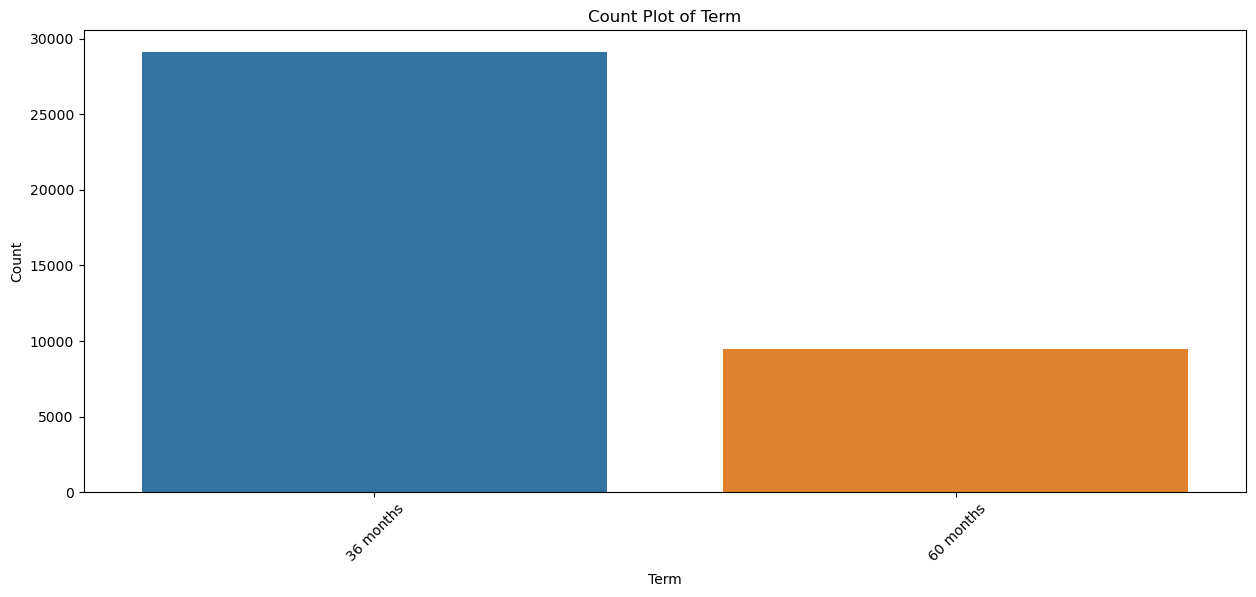

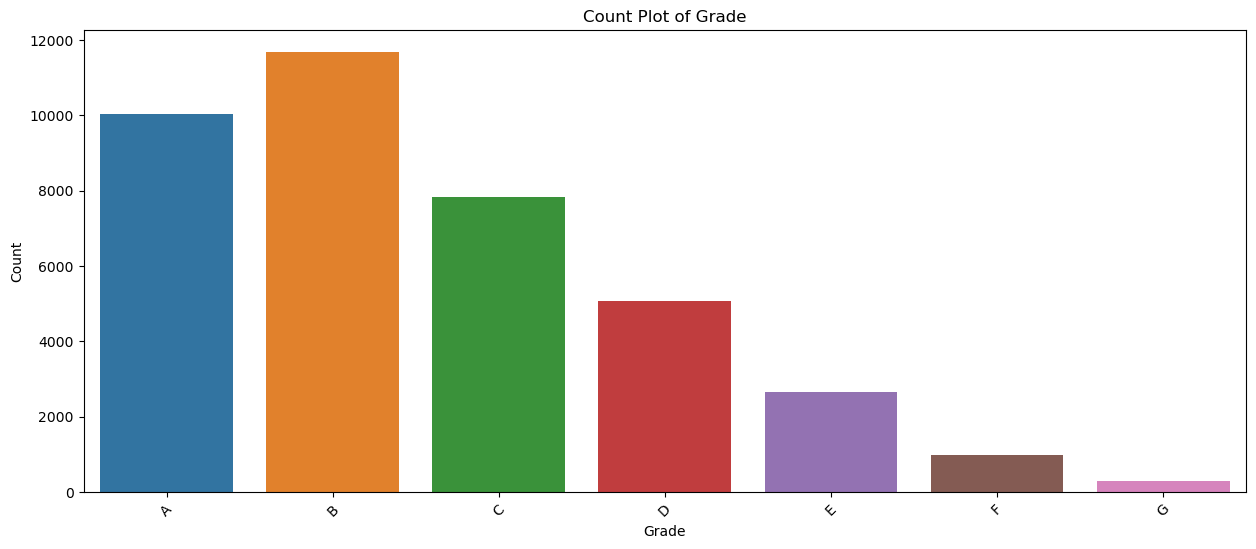

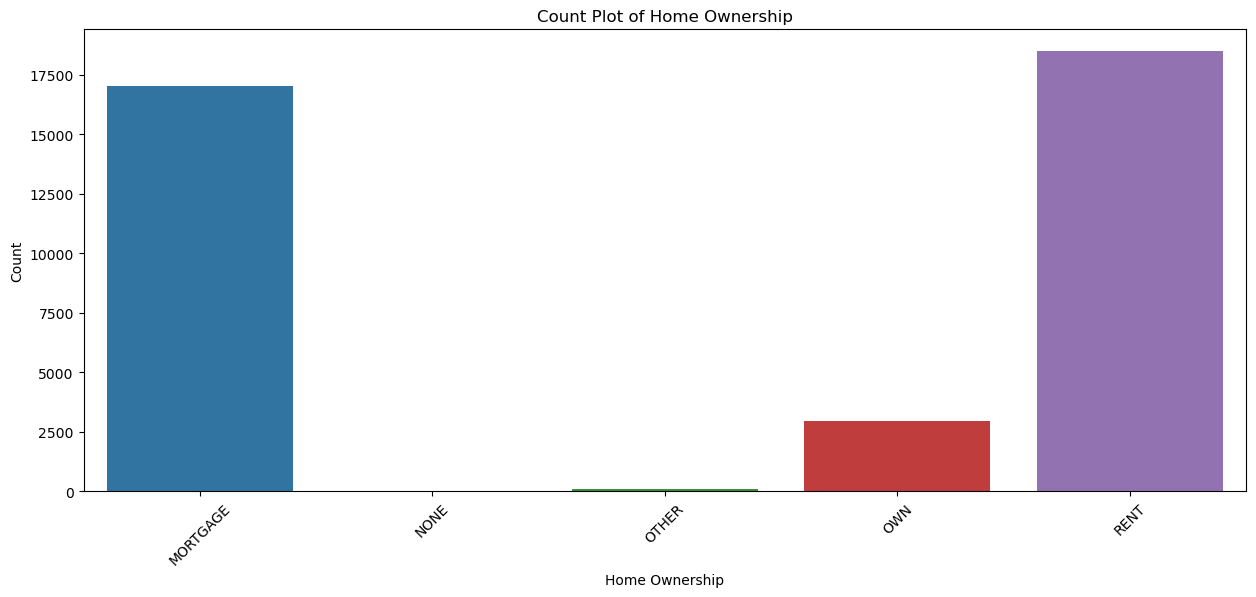

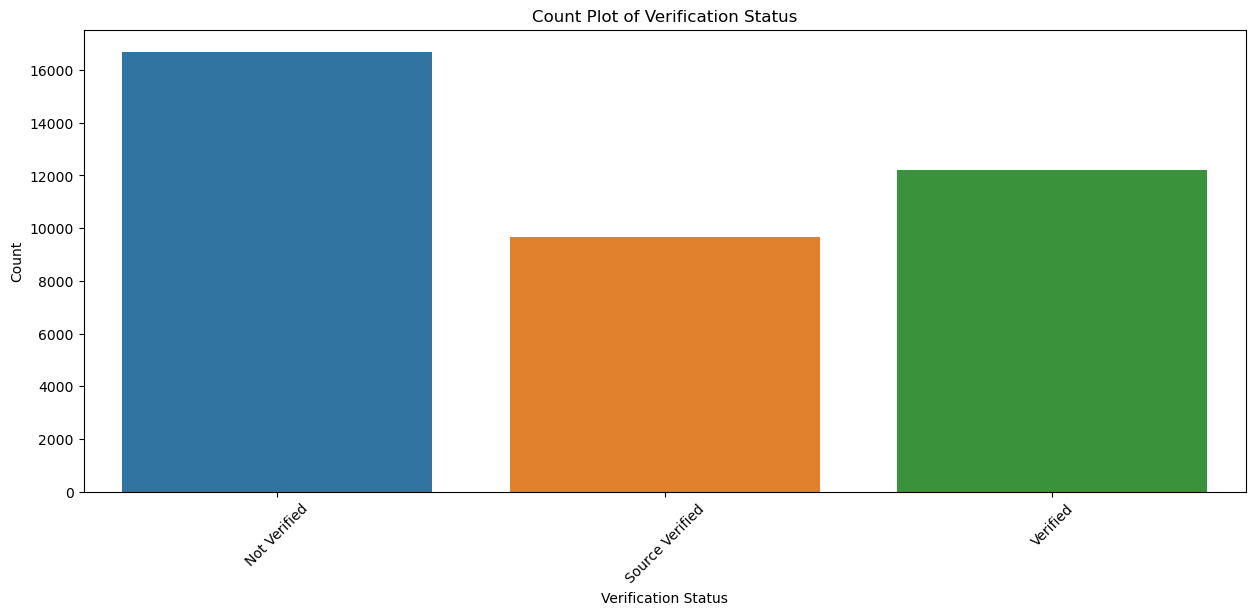

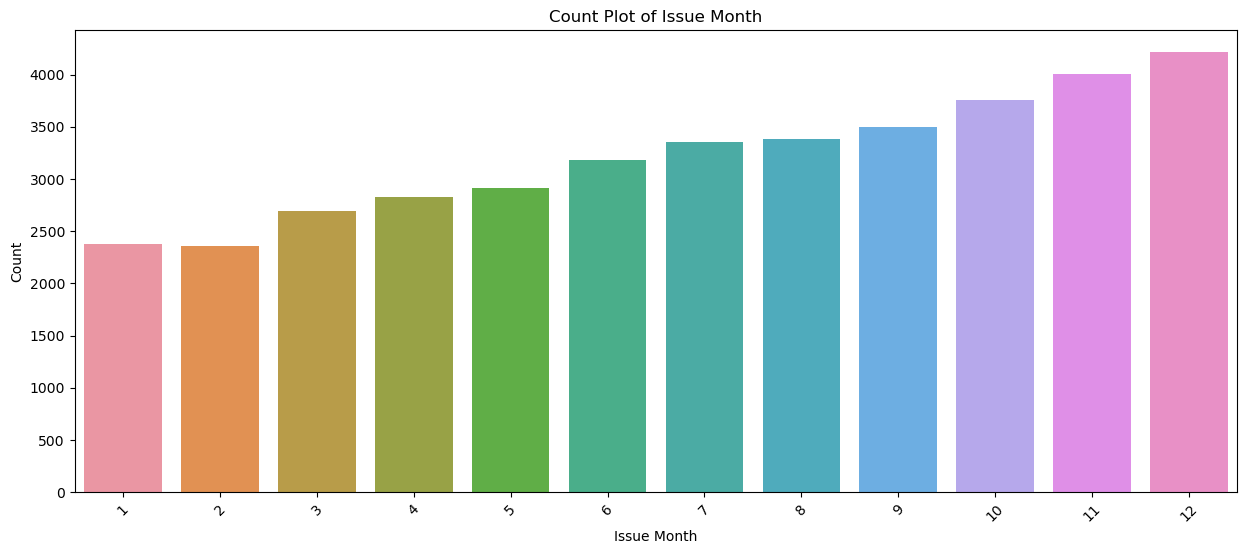

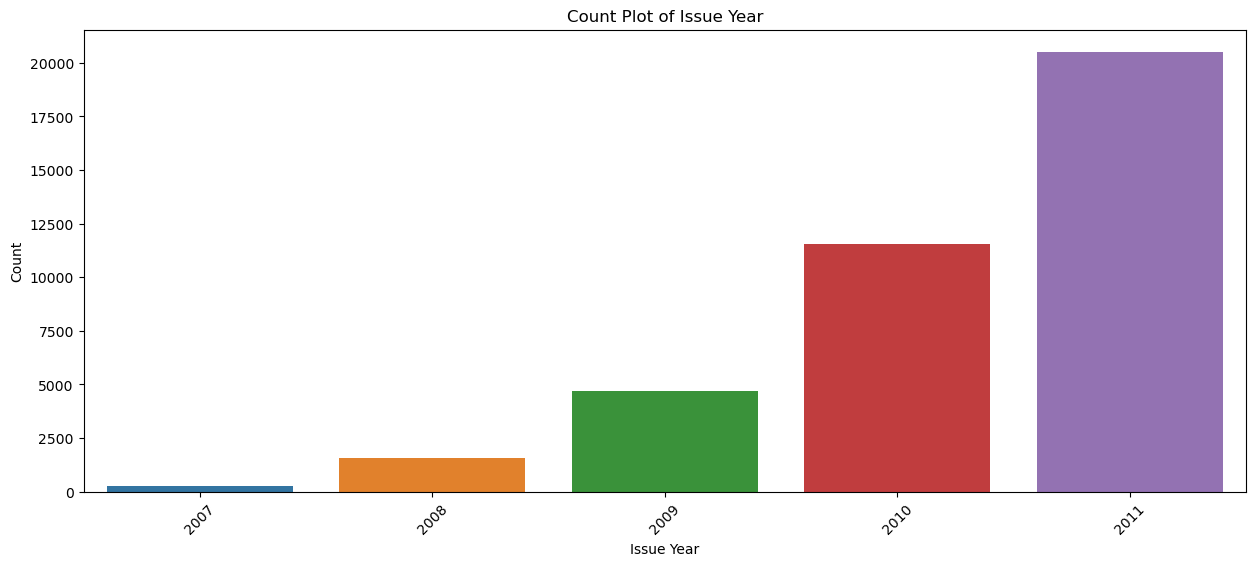

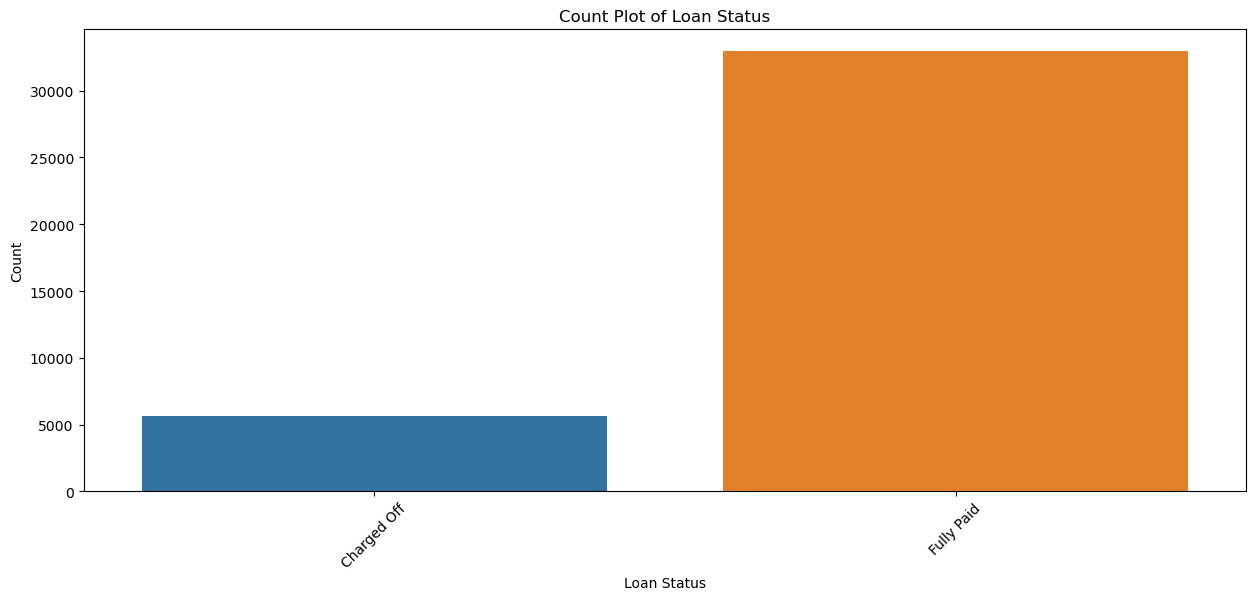

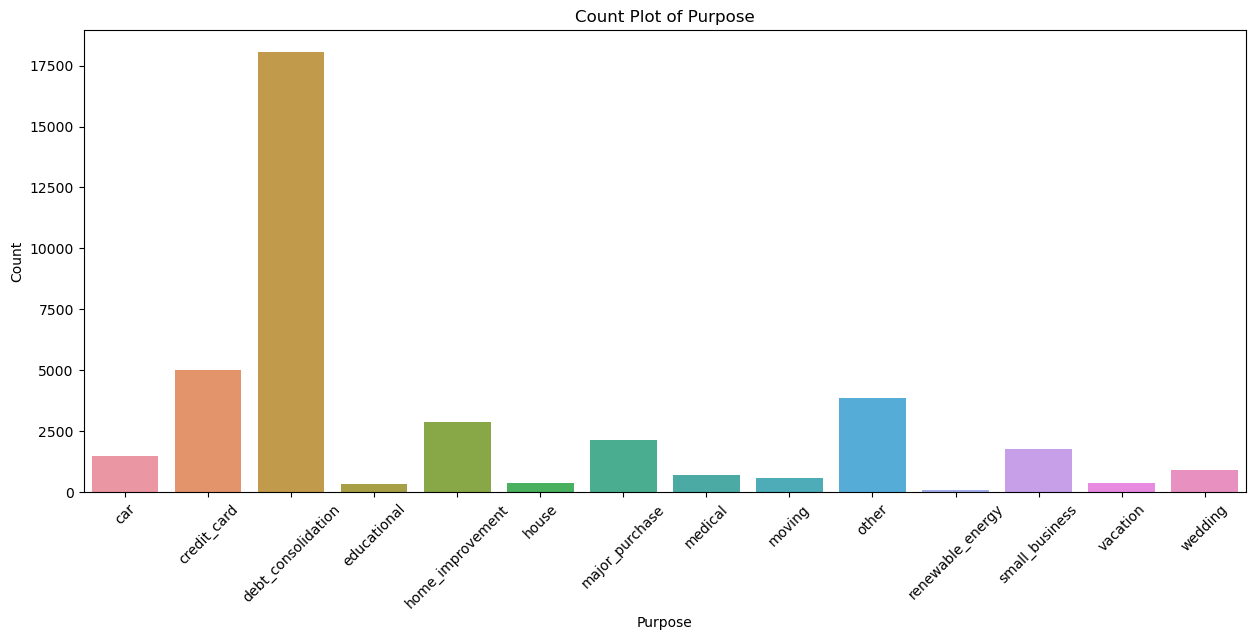

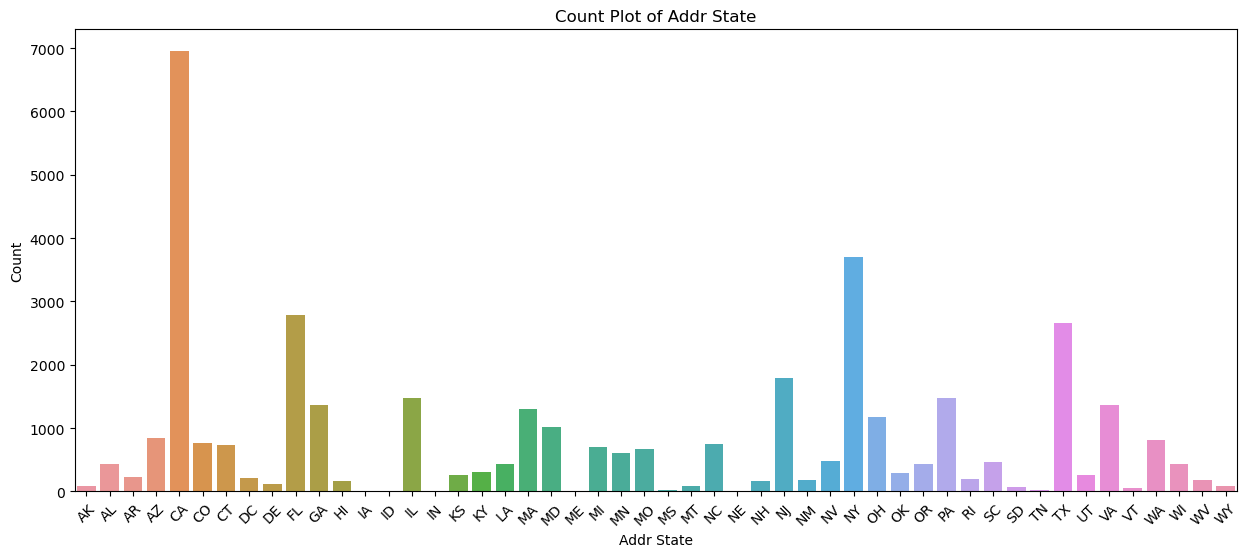

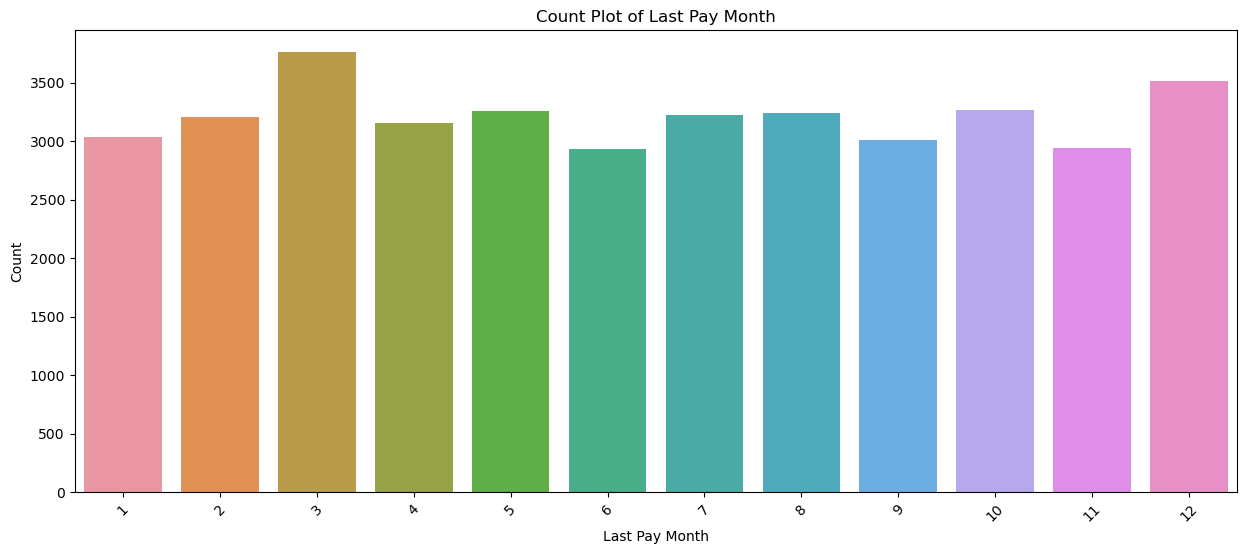

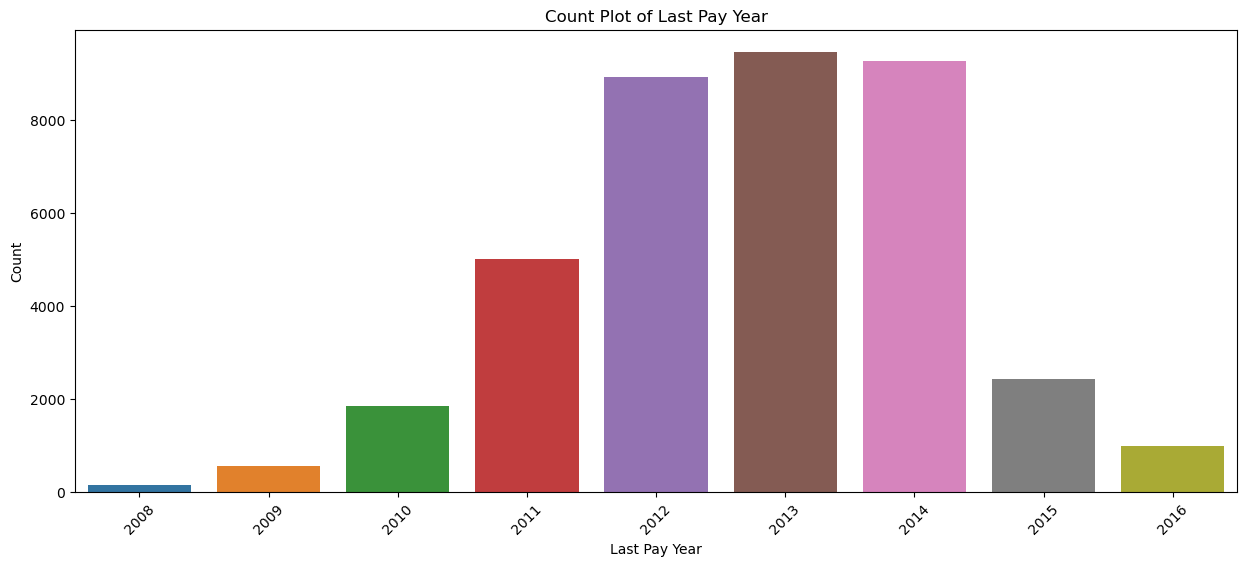

In [405]:
for col in cat_cols:
    col_name = col.replace('_', ' ').title()
    plt.figure(figsize=(15, 6))

    sns.countplot(x=df[col].sort_values())
    plt.xticks(rotation=45)

    plt.xlabel(col_name)
    plt.ylabel('Count')
    plt.title('Count Plot of '+col_name)
    plt.show()

### Numercial vs Loan Status

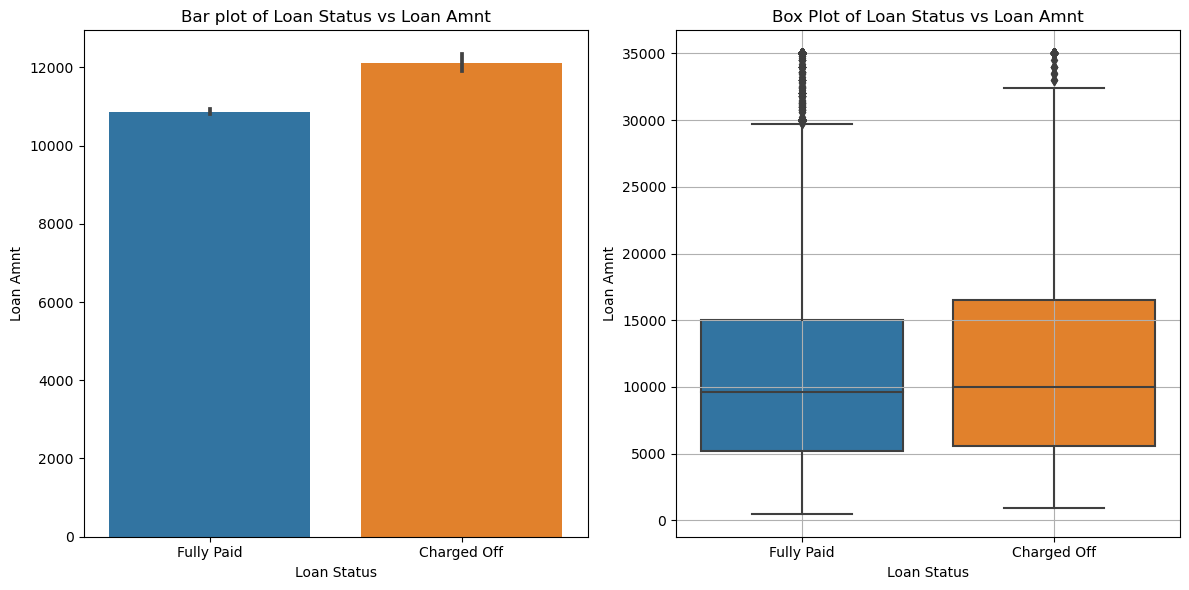

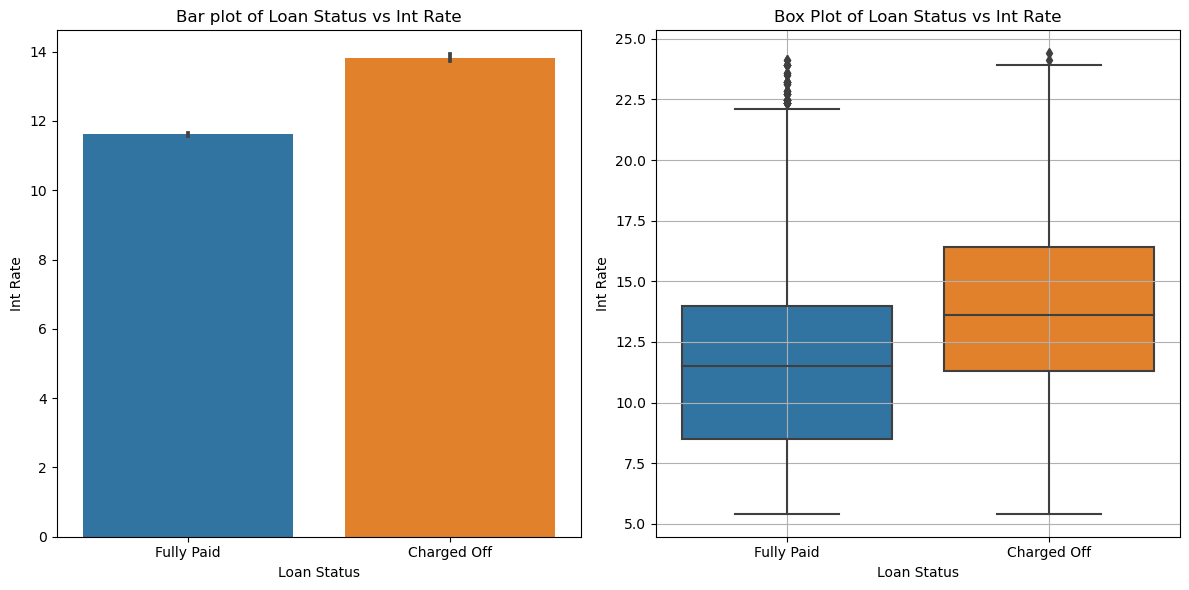

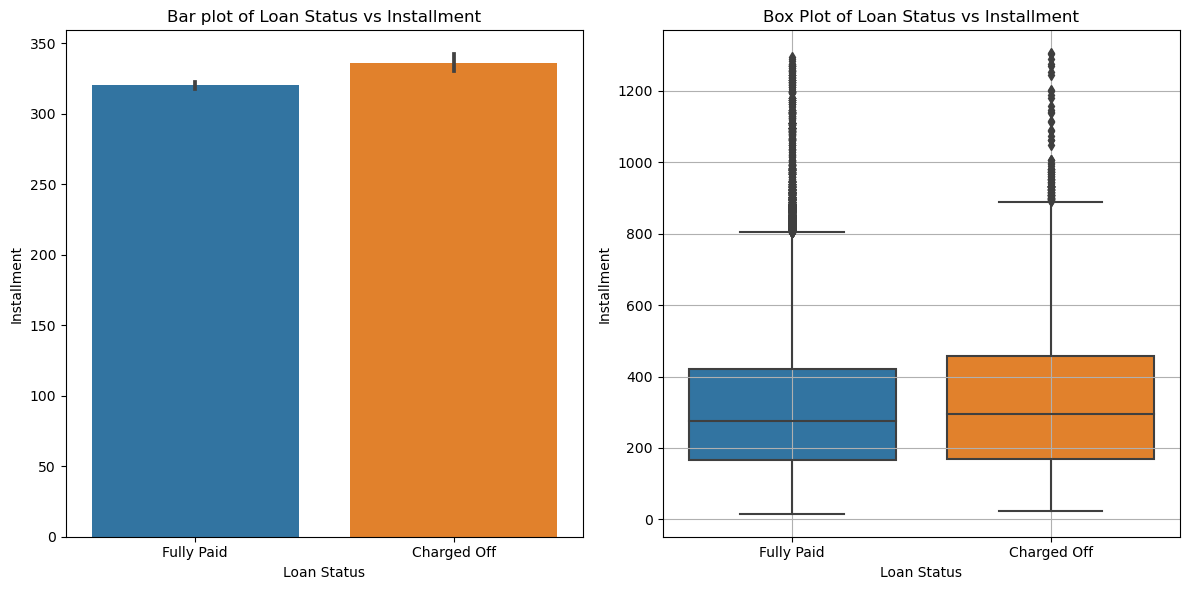

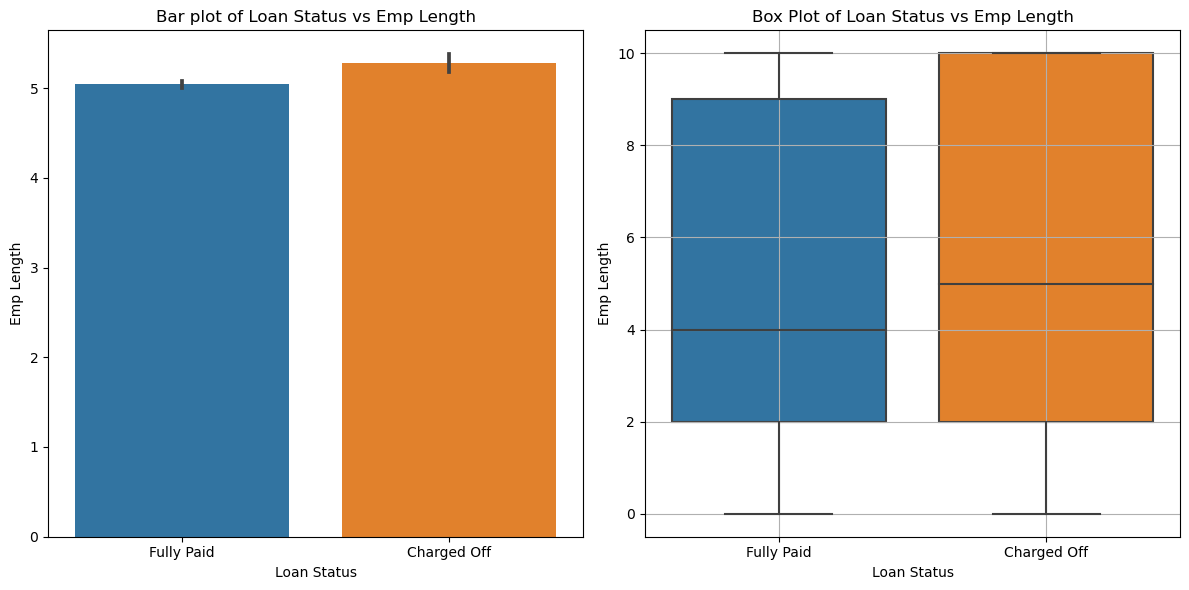

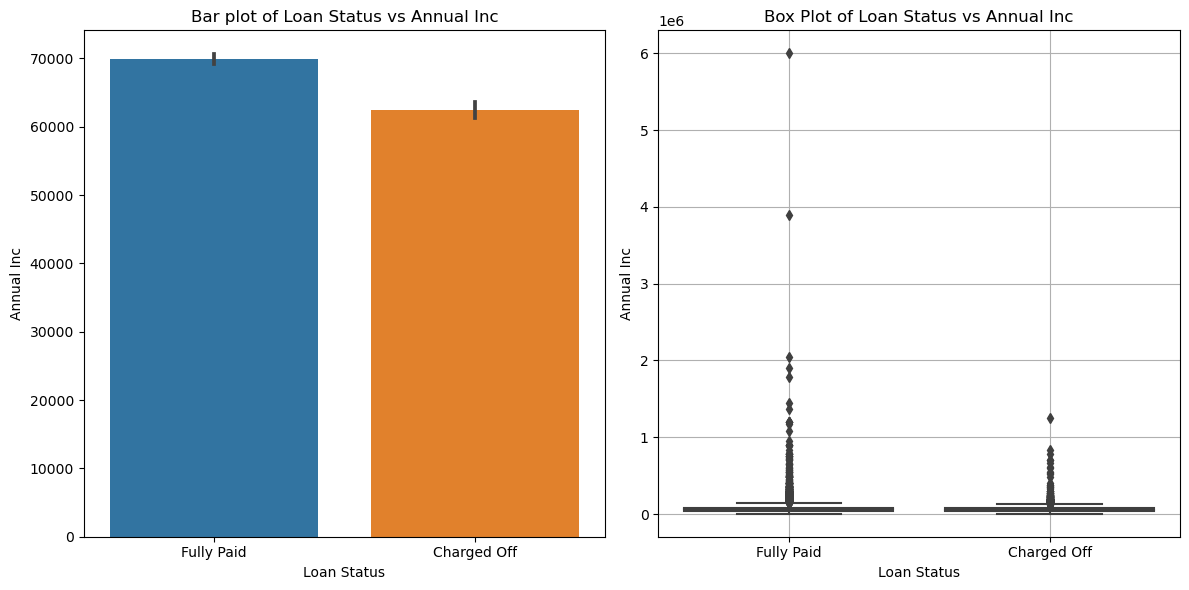

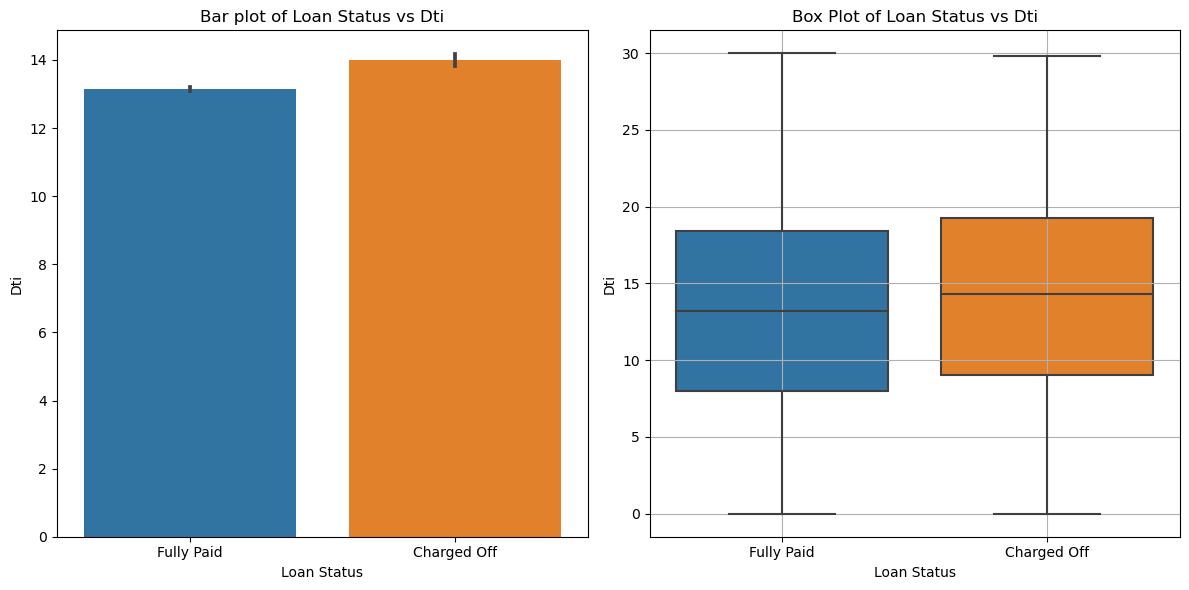

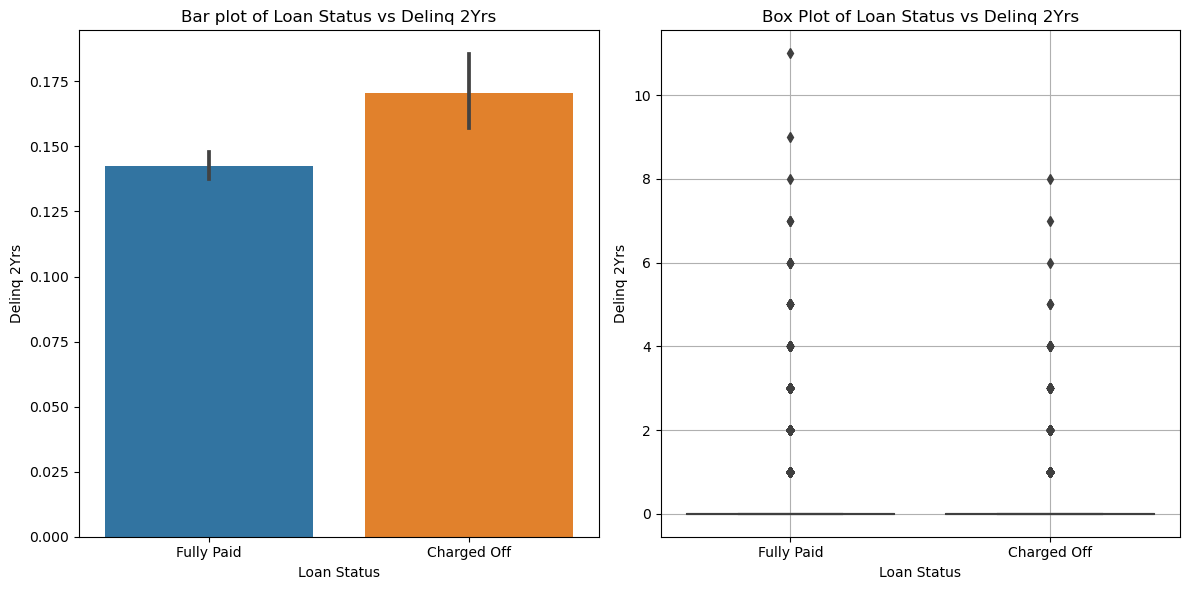

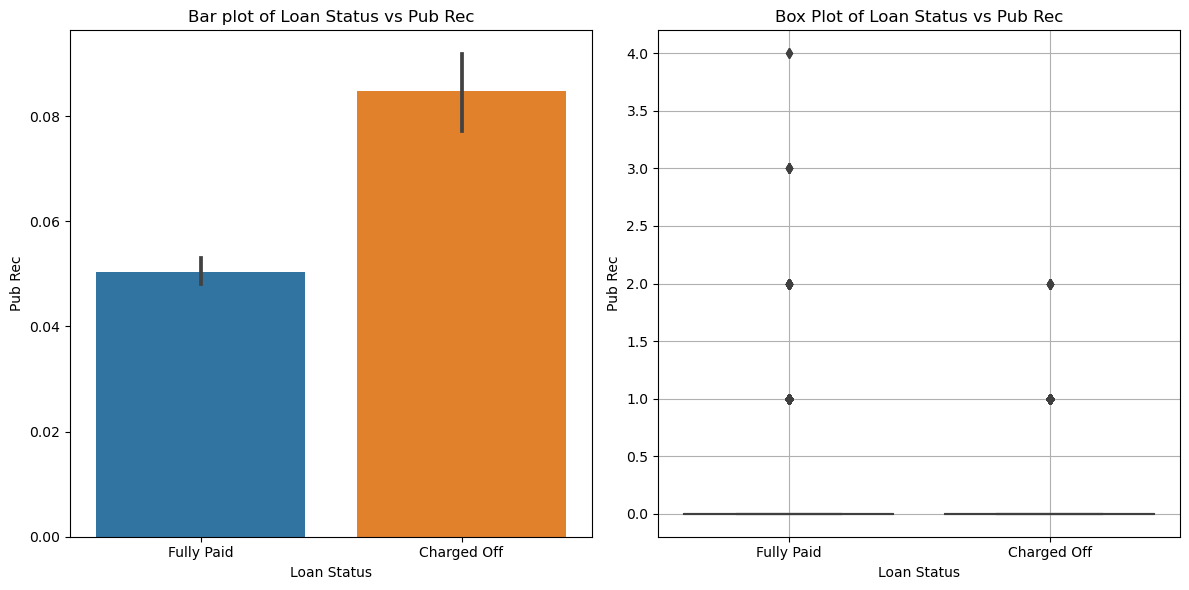

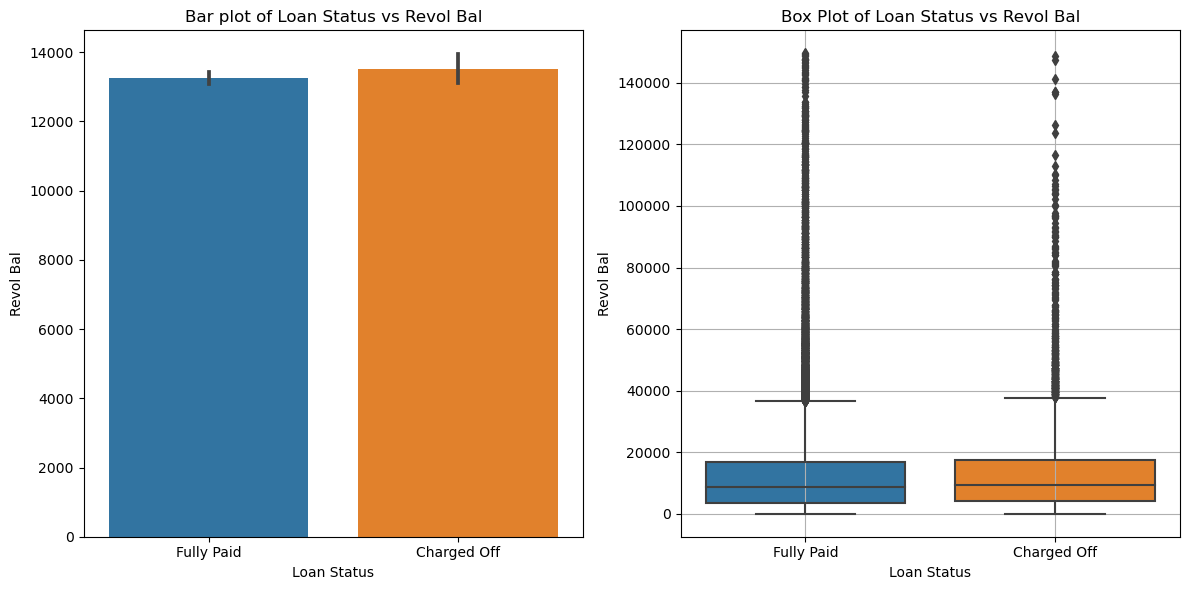

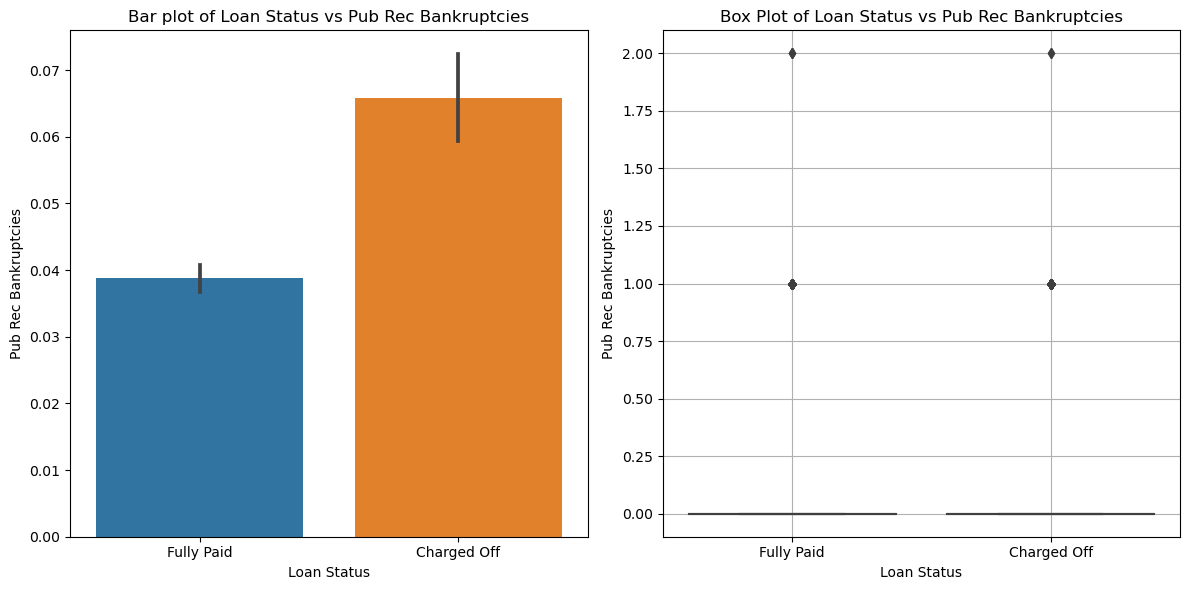

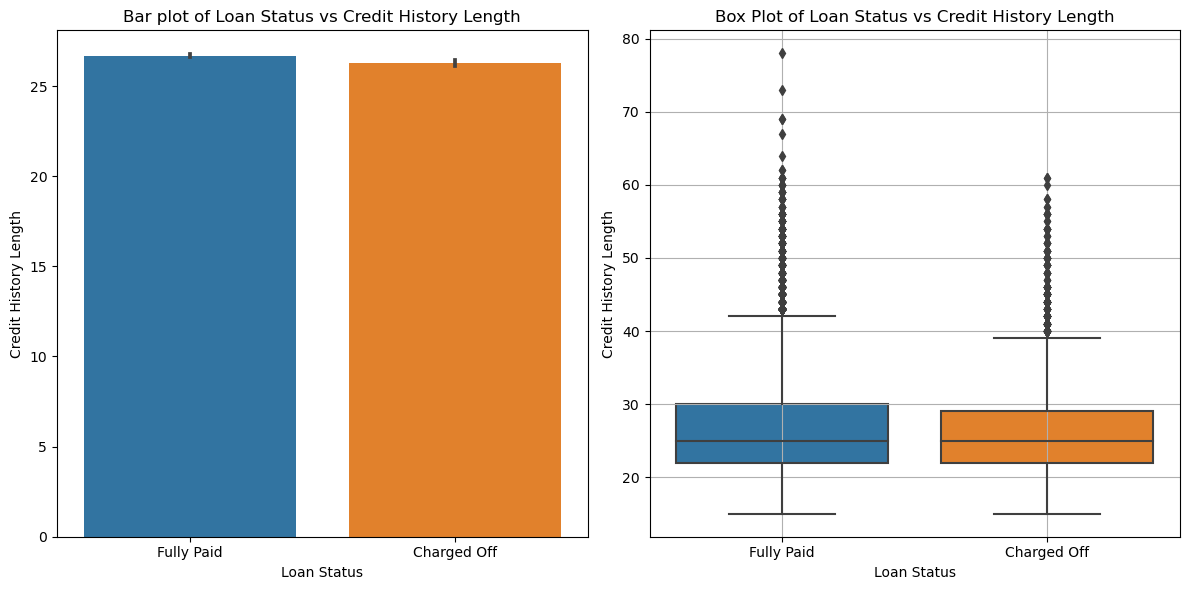

In [406]:
for col in num_cols:
    data = df[col]
    col_name = col.replace('_', ' ').title()
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    sns.barplot(x=df['loan_status'], y=df[col], estimator=np.mean, ax=axs[0])
    axs[0].set_title('Bar plot of Loan Status vs '+col_name)
    axs[0].set_xlabel('Loan Status')
    axs[0].set_ylabel(col_name)

    sns.boxplot(x=df['loan_status'], y=df[col], ax=axs[1])
    axs[1].set_title('Box Plot of Loan Status vs '+col_name)
    axs[1].set_xlabel('Loan Status')
    axs[1].set_ylabel(col_name)
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

### Categorical vs Loan Status

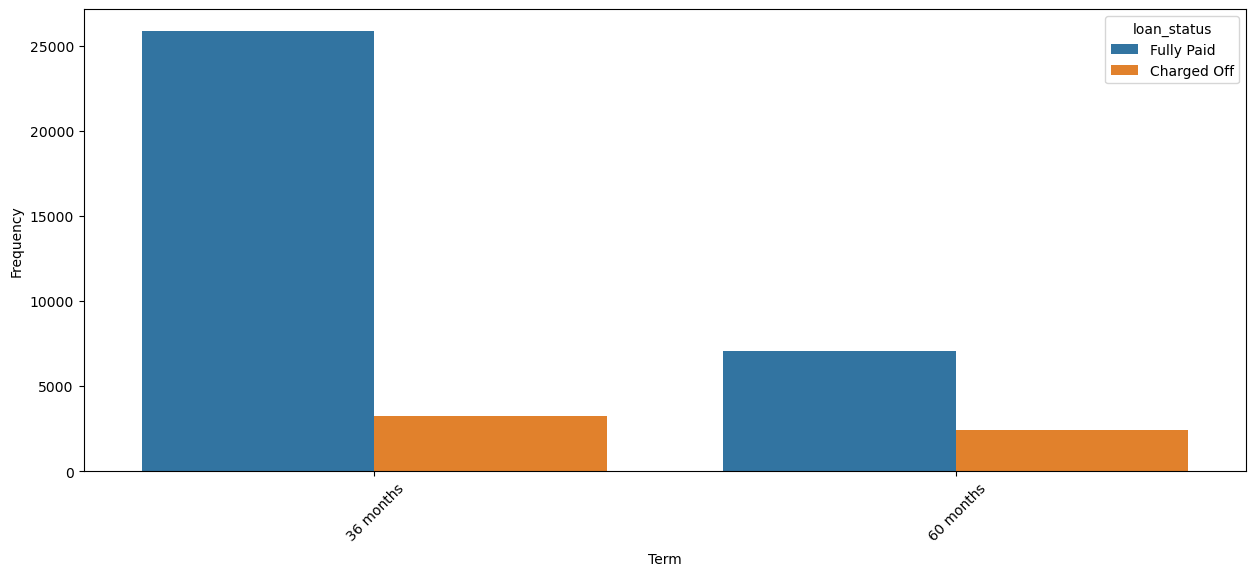

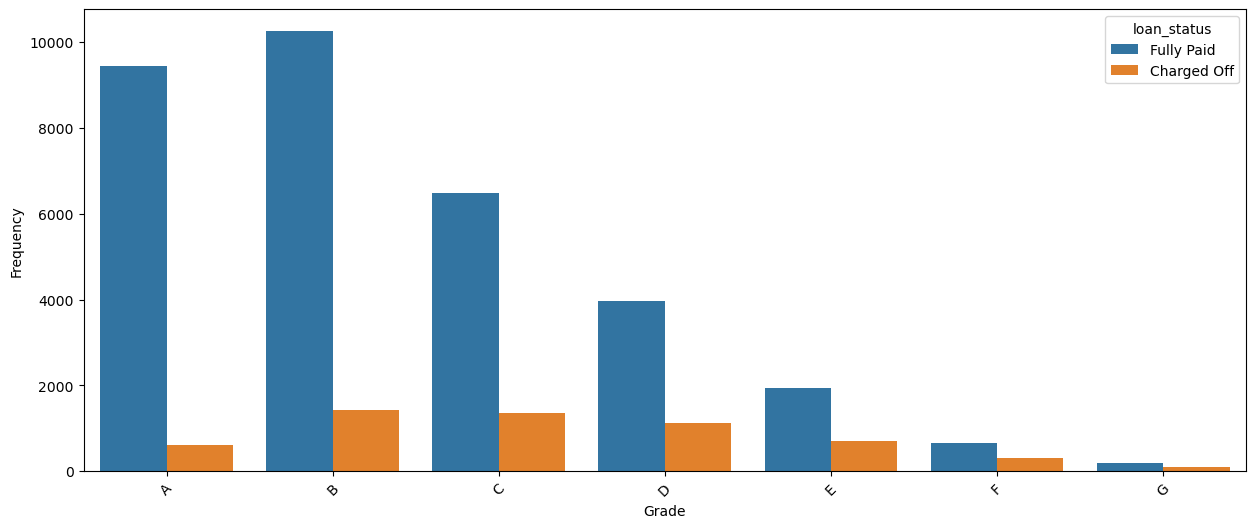

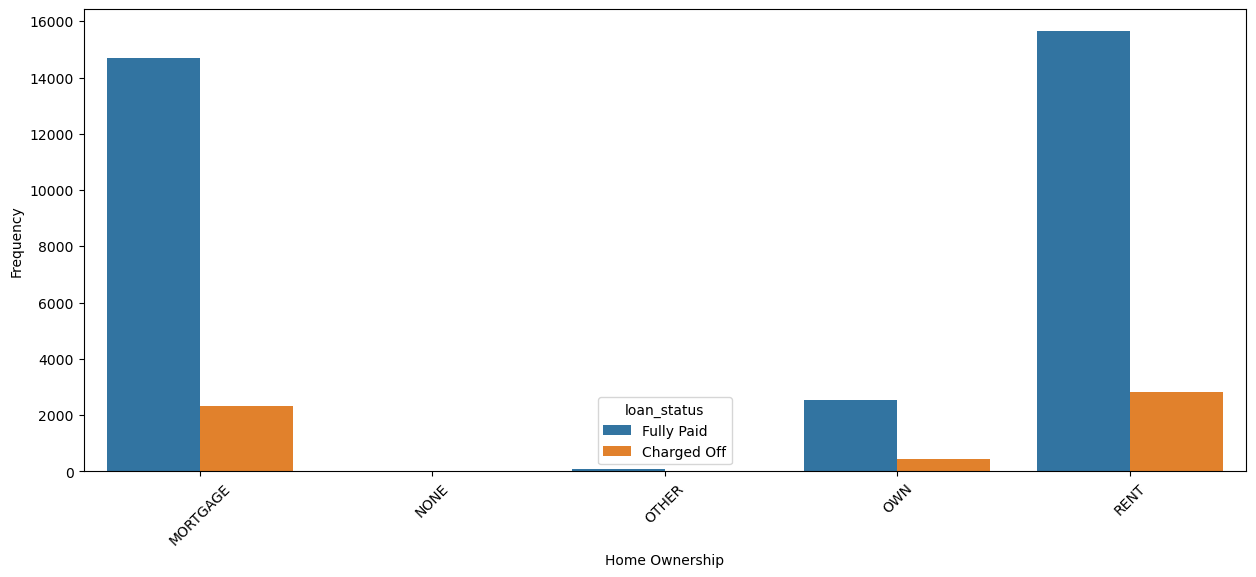

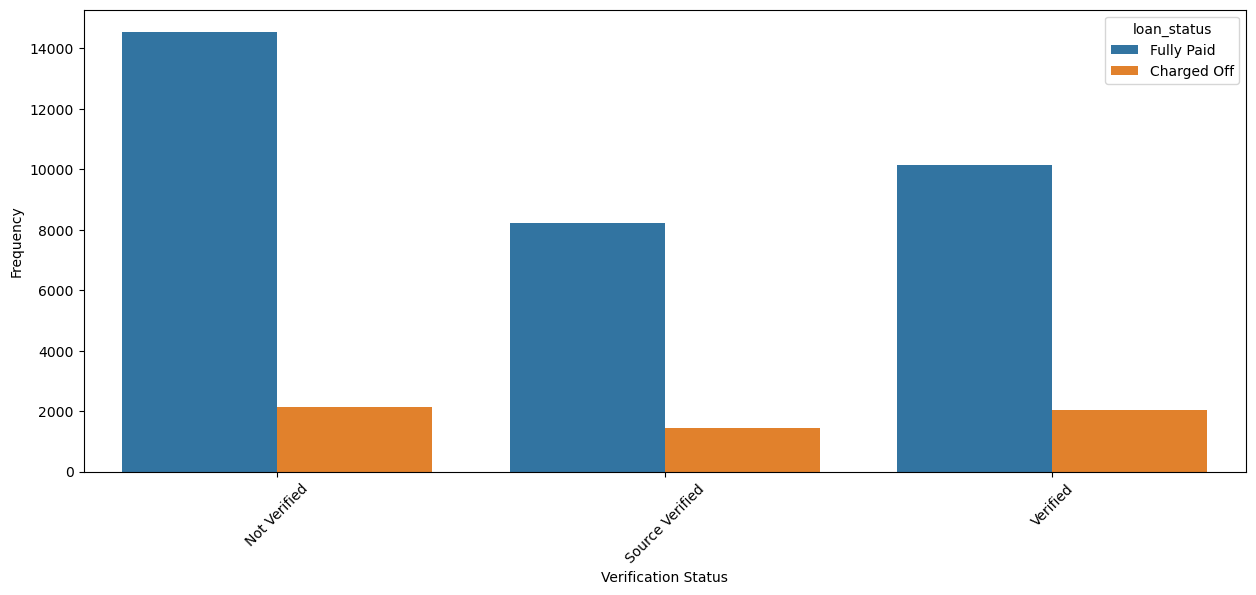

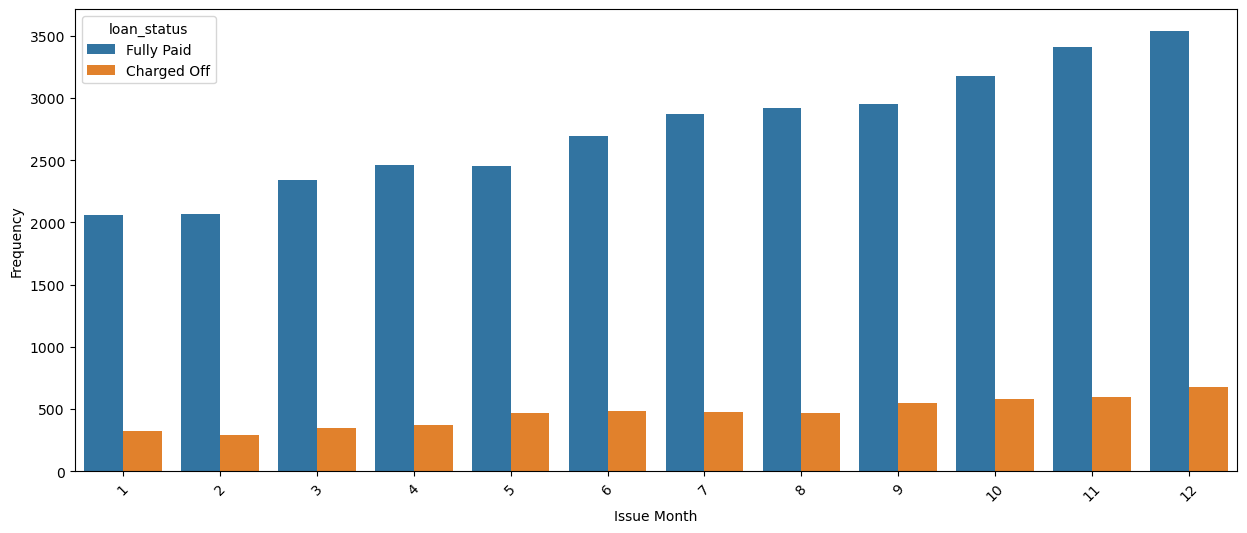

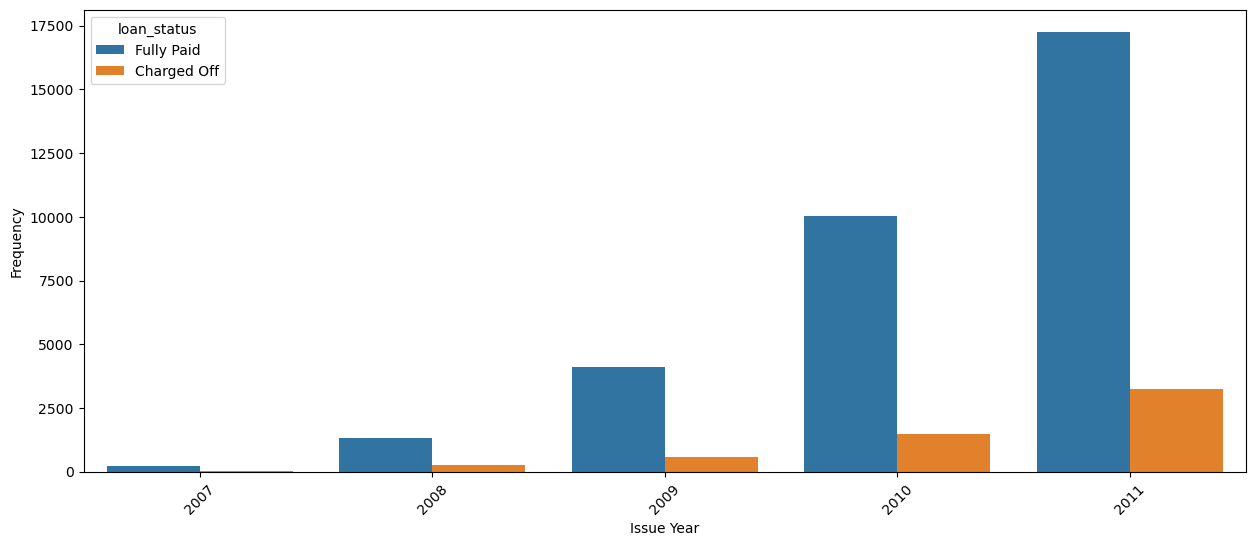

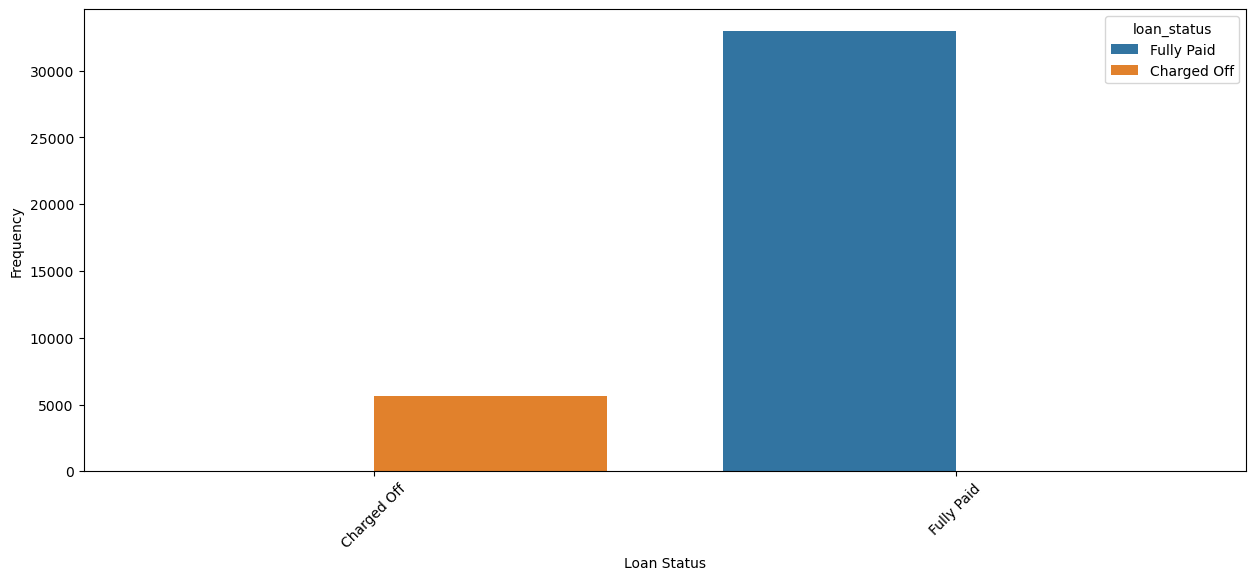

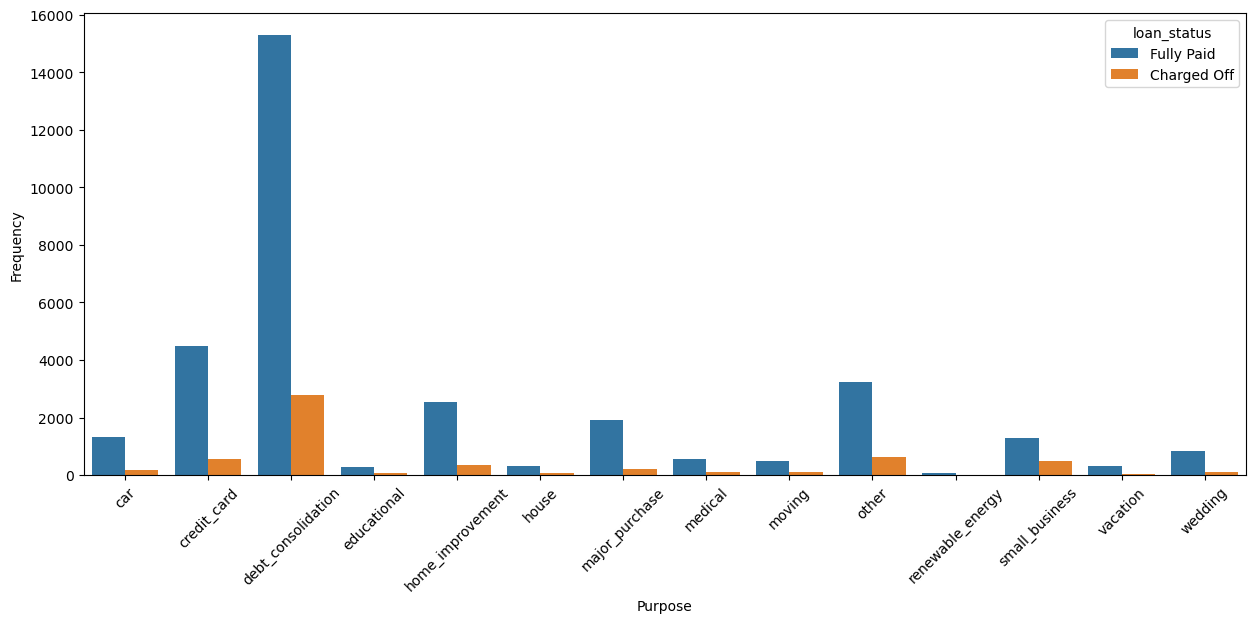

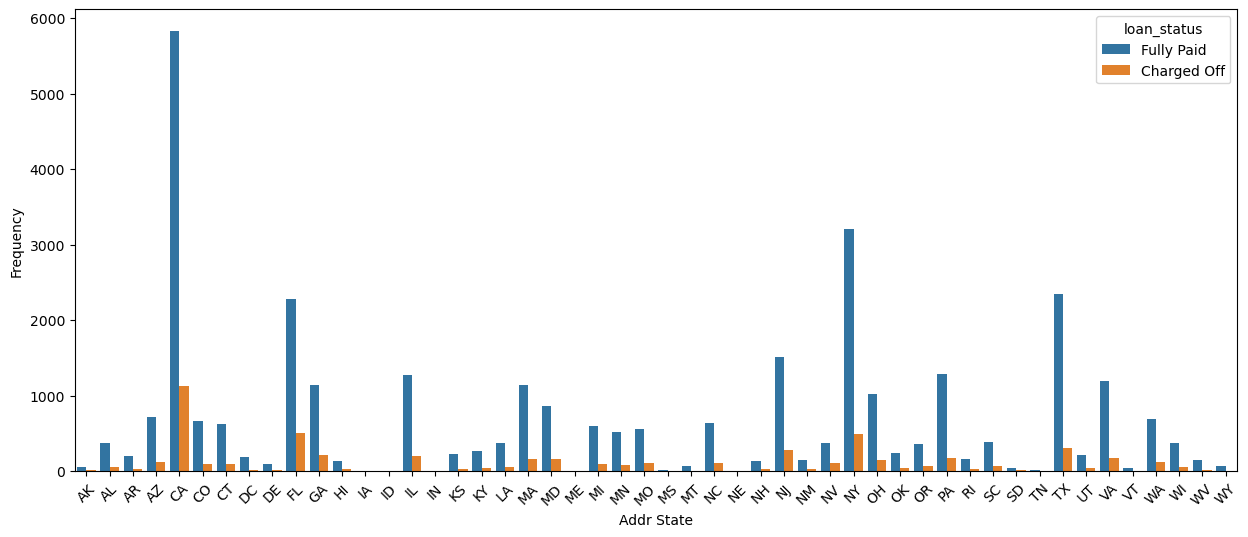

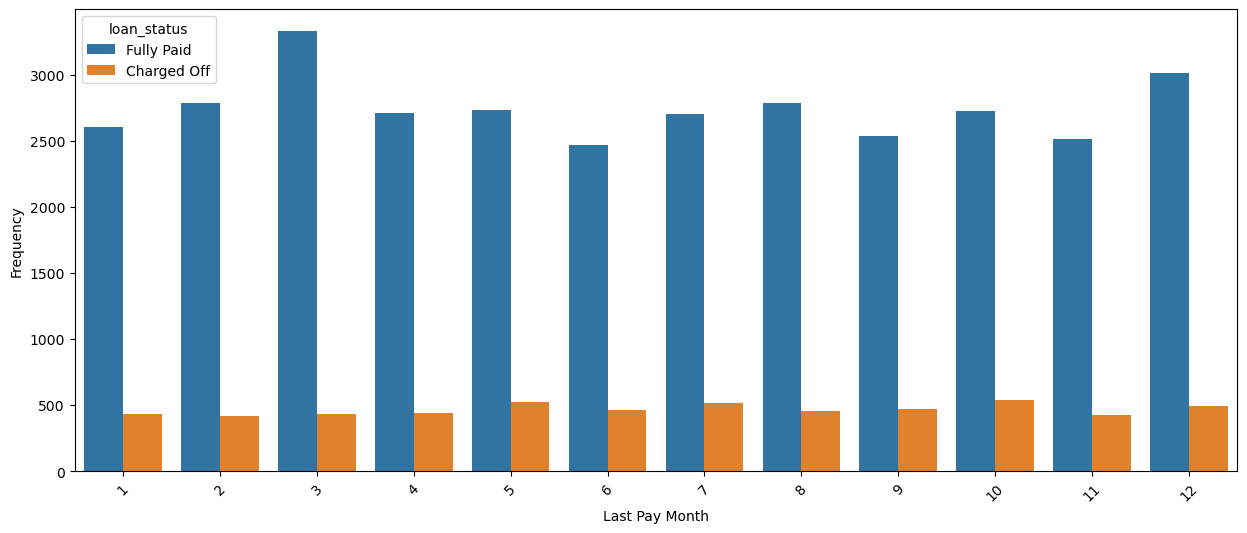

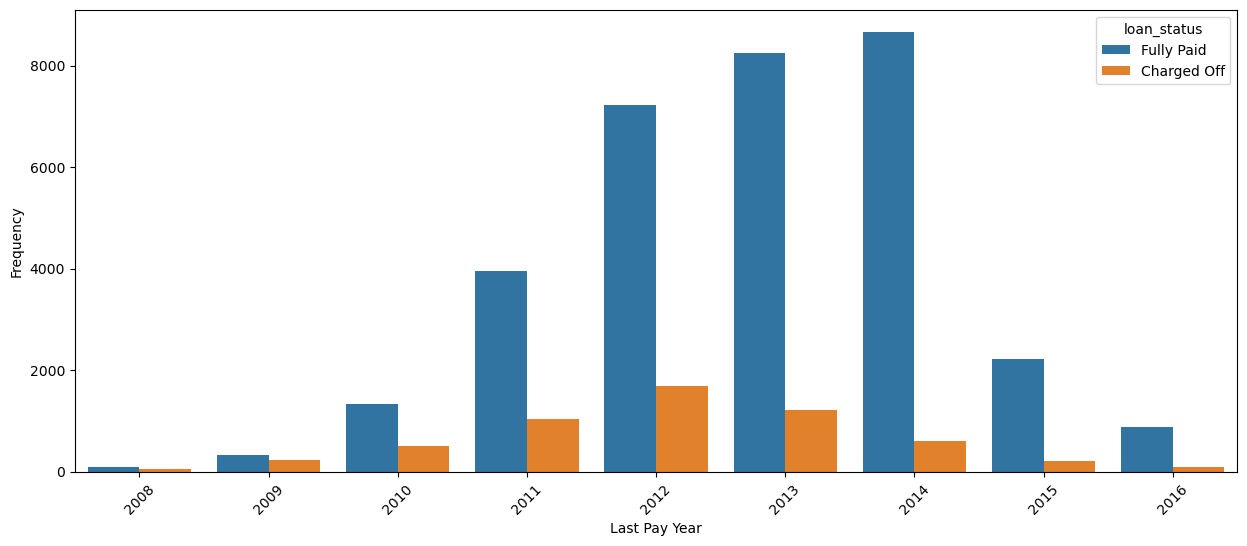

In [407]:
for col in cat_cols:
    col_name = col.replace('_', ' ').title()
    plt.figure(figsize=(15, 6))
    plt.xticks(rotation=45)
    sns.countplot(x=df[col].sort_values(),hue=df['loan_status'])
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.show()

### Heat Map

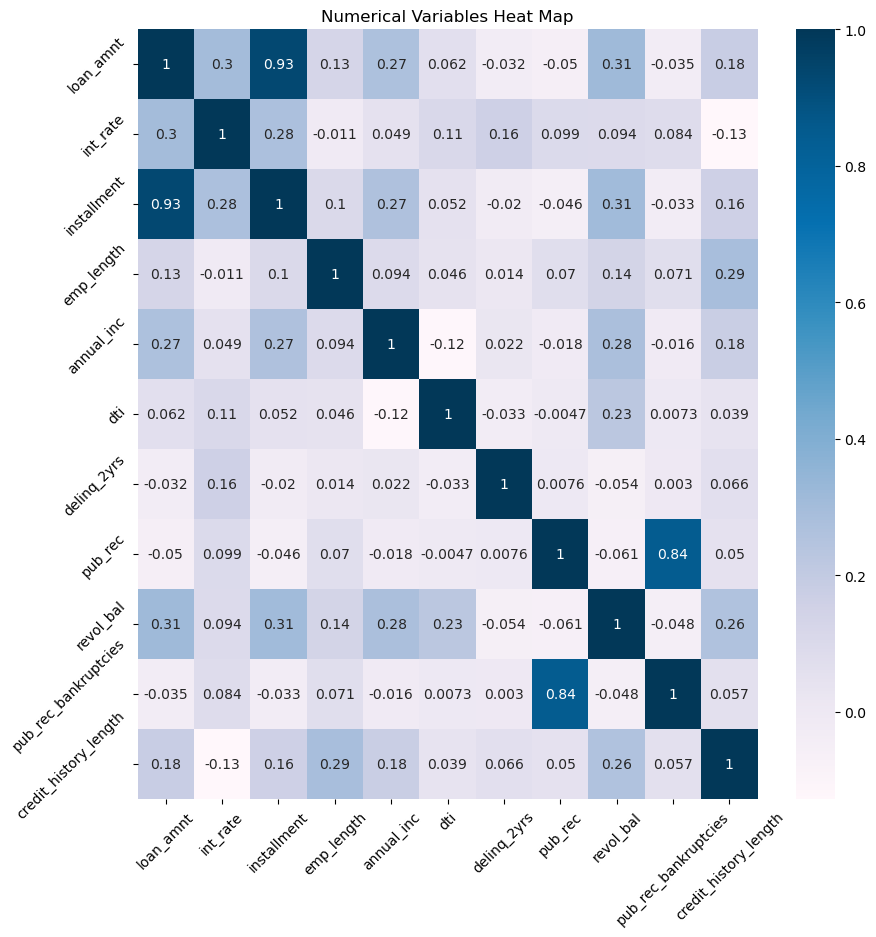

In [410]:
plt.figure(figsize=(10, 10))
sns.heatmap(df[num_cols].corr(), cmap='PuBu', annot=True)

plt.title("Numerical Variables Heat Map")
plt.yticks(rotation=45)
plt.xticks(rotation=45)

plt.show()